# 중요 x변수 정하기

In [145]:
import pandas as pd
import numpy as np

import warnings

import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score,\
recall_score, roc_auc_score, confusion_matrix, classification_report

warnings.filterwarnings(action='ignore')
plt.rc('font', family='Noto Sans CJK JP')

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import export_graphviz

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.rc('font',family = 'Noto Sans CJK JP')

In [1]:
import pandas as pd
print("pandas version: ", pd.__version__)
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

pandas version:  1.2.4


In [2]:
df_all = pd.read_csv('./final_df_all_ver0.4.csv',engine = 'python')
df_all.head()

,chaju_id,credit_class,score_risk,gender,age,agegroup,job,edu,dwell_type,house_type,marriage,income_home_grp,expenditure_grp,child_cd,no_child,flag_priv_biz_cd,card_count,card_period,loan_period,Pcard_loan_amt,over_period,Pcard_over_amt,over_amt,loan_amt_final2,del_rate,loan_count,overdue_count,income_ind_grp
0,C-1001,C05,478,남성,30,30대,기능/노무직,대학교 졸업,자가,아파트,미혼,900-999만원,100-199만원,N,0,N,4.0,99.0,79.0,0.0,2.0,0.0,5700000.0,70300000.0,8.108108,9.0,1.0,300-399만원
1,C-1002,C05,484,여성,66,60대,전업주부,초등학교 졸업,자가,아파트,기혼,200-299만원,99만원 이하,Y,3,Y,6.0,126.0,6.0,350000.0,0.0,0.0,0.0,3150000.0,0.000000,2.0,0.0,200-299만원
2,C-1003,C05,478,남성,43,40대,판매/서비스직,대학교 졸업,자가,아파트,기혼,500-599만원,100-199만원,Y,2,N,2.0,50.0,79.0,0.0,0.0,0.0,0.0,391000000.0,0.000000,5.0,0.0,500-599만원
3,C-1004,C05,445,남성,28,20대,무직/기타,대학교 졸업,자가,아파트,미혼,500-599만원,99만원 이하,N,0,N,1.0,25.0,5.0,0.0,0.0,0.0,0.0,590000.0,0.000000,2.0,0.0,100-199만원
4,C-1005,C05,421,남성,52,50대,행정관리/전문직,대학교 졸업,자가,아파트,기혼,500-599만원,200-299만원,Y,2,N,3.0,75.0,40.0,0.0,0.0,0.0,0.0,367200000.0,0.000000,4.0,0.0,300-399만원


In [149]:
df_all.describe()

,score_risk,age,no_child,card_count,card_period,loan_period,Pcard_loan_amt,over_period,Pcard_over_amt,over_amt,loan_amt_final2,del_rate,loan_count,overdue_count
count,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1429.000000,1.429000e+03,1.429000e+03,1.429000e+03,1429.000000,1429.000000,1429.000000
mean,458.396081,48.215535,1.392582,2.600420,53.965710,41.130161,2.080896e+05,7.546536,1.478376e+05,1.029682e+07,9.472584e+07,17.215474,3.706788,0.618614
std,96.324585,13.785665,0.905462,1.975841,41.175355,36.797175,1.569941e+06,18.144305,3.862480e+06,6.015128e+07,1.553346e+08,33.514757,3.644395,1.384474
min,185.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,398.000000,38.000000,1.000000,1.000000,25.000000,15.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e+07,0.000000,1.000000,0.000000
50%,457.000000,48.000000,2.000000,2.000000,50.000000,28.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,3.800000e+07,0.000000,2.000000,0.000000
75%,514.000000,58.000000,2.000000,4.000000,83.000000,59.000000,0.000000e+00,4.000000,0.000000e+00,8.600000e+05,1.147000e+08,10.749186,5.000000,1.000000
max,824.000000,85.000000,3.000000,10.000000,176.000000,193.000000,2.790000e+07,150.000000,1.400000e+08,1.502500e+09,1.800000e+09,100.000000,19.000000,11.000000


In [150]:
df_all['del_rate'].value_counts()

0.000000      1029
100.000000     133
50.000000        6
39.318588        1
30.959752        1
              ... 
38.927244        1
26.731596        1
63.855422        1
86.111111        1
97.112861        1
Name: del_rate, Length: 264, dtype: int64

In [151]:
df_all['del_rate'].fillna(0, inplace = True)
df_all = df_all.replace([np.inf, -np.inf], 100) # replace 메서드로 np.inf를 None(np.nan)으로 변경

for i in range(len(df_all)):
    if df_all['del_rate'][i] > 100:
        df_all['del_rate'][i] = 100

In [152]:
df_all['del_rate'].value_counts()

0.000000      1029
100.000000     133
50.000000        6
39.318588        1
30.959752        1
              ... 
38.927244        1
26.731596        1
63.855422        1
86.111111        1
97.112861        1
Name: del_rate, Length: 264, dtype: int64

In [153]:
df_all.describe()

,score_risk,age,no_child,card_count,card_period,loan_period,Pcard_loan_amt,over_period,Pcard_over_amt,over_amt,loan_amt_final2,del_rate,loan_count,overdue_count
count,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1429.000000,1.429000e+03,1.429000e+03,1.429000e+03,1429.000000,1429.000000,1429.000000
mean,458.396081,48.215535,1.392582,2.600420,53.965710,41.130161,2.080896e+05,7.546536,1.478376e+05,1.029682e+07,9.472584e+07,17.215474,3.706788,0.618614
std,96.324585,13.785665,0.905462,1.975841,41.175355,36.797175,1.569941e+06,18.144305,3.862480e+06,6.015128e+07,1.553346e+08,33.514757,3.644395,1.384474
min,185.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,398.000000,38.000000,1.000000,1.000000,25.000000,15.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e+07,0.000000,1.000000,0.000000
50%,457.000000,48.000000,2.000000,2.000000,50.000000,28.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,3.800000e+07,0.000000,2.000000,0.000000
75%,514.000000,58.000000,2.000000,4.000000,83.000000,59.000000,0.000000e+00,4.000000,0.000000e+00,8.600000e+05,1.147000e+08,10.749186,5.000000,1.000000
max,824.000000,85.000000,3.000000,10.000000,176.000000,193.000000,2.790000e+07,150.000000,1.400000e+08,1.502500e+09,1.800000e+09,100.000000,19.000000,11.000000


# 이상한 값 처리

In [75]:
df_all.shape

(1429, 28)

In [76]:
def family(y):
    if y == '500-599만원':
        won = 550
    elif y == '300-399만원':
        won = 350
    elif y == '400-499만원':
        won = 450
    elif y == '600-699만원':
        won = 650
    elif y == '200-299만원':
        won = 250
    elif y == '700-799만원':
        won = 750
    elif y == '100-199만원':
        won = 150
    elif y == '800-899만원':
        won = 850
    elif y == '99만원 이하':
        won = 50
    elif y == '1000만원 이상':
        won = 1050
    elif y == '900-999만원':
        won = 950
    else:
        won = 0
        
    return won

In [77]:
df_all['income_home_grp'] = df_all['income_home_grp'].apply(lambda y: family(y))
df_all['income_ind_grp'] = df_all['income_ind_grp'].apply(lambda y: family(y))

# chaju_main[['age','job','']]
df_all.head()

,chaju_id,credit_class,score_risk,gender,age,agegroup,job,edu,dwell_type,house_type,...,loan_period,Pcard_loan_amt,over_period,Pcard_over_amt,over_amt,loan_amt_final2,del_rate,loan_count,overdue_count,income_ind_grp
0,C-1001,C05,478,남성,30,30대,기능/노무직,대학교 졸업,자가,아파트,...,79.0,0.0,2.0,0.0,5700000.0,70300000.0,8.108108,9.0,1.0,0
1,C-1002,C05,484,여성,66,60대,전업주부,초등학교 졸업,자가,아파트,...,6.0,350000.0,0.0,0.0,0.0,3150000.0,0.000000,2.0,0.0,0
2,C-1003,C05,478,남성,43,40대,판매/서비스직,대학교 졸업,자가,아파트,...,79.0,0.0,0.0,0.0,0.0,391000000.0,0.000000,5.0,0.0,0
3,C-1004,C05,445,남성,28,20대,무직/기타,대학교 졸업,자가,아파트,...,5.0,0.0,0.0,0.0,0.0,590000.0,0.000000,2.0,0.0,0
4,C-1005,C05,421,남성,52,50대,행정관리/전문직,대학교 졸업,자가,아파트,...,40.0,0.0,0.0,0.0,0.0,367200000.0,0.000000,4.0,0.0,0


In [90]:
cnt = 0
a = []
for i in range(len(df_all)):
    if df_all['income_home_grp'][i] < df_all['income_ind_grp'][i]:
        a.append(i)
        cnt += 1
print(a)
print(cnt)

[]
0


In [79]:
df_all[['income_ind_grp','income_home_grp']].iloc[a,:]

,income_ind_grp,income_home_grp


In [80]:
for i in range(len(df_all)):
    if df_all['income_home_grp'][i] < df_all['income_ind_grp'][i]:
        df_all['income_ind_grp'][i] = df_all['income_home_grp'][i]


In [81]:
cnt = 0
a = []
for i in range(len(df_all)):
    if df_all['income_home_grp'][i] < df_all['income_ind_grp'][i]:
        a.append(i)
        cnt += 1
print(a)
print(cnt)

[]
0


In [87]:
def change(y):
    if y == 550:
        won = '500-599만원'
    elif y == 350:
        won = '300-399만원'
    elif y == 450:
        won = '400-499만원'
    elif y == 650:
        won = '600-699만원'
    elif y == 250:
        won = '200-299만원'
    elif y == 750:
        won = '700-799만원'
    elif y == 150:
        won = '100-199만원'
    elif y == 850:
        won = '800-899만원'
    elif y == 50:
        won = '99만원 이하'
    elif y == 1050:
        won = '1000만원 이상'
    else:
        won = '900-999만원'
        
    return won

In [88]:
df_all['income_home_grp'] = df_all['income_home_grp'].apply(lambda y: change(y))
df_all['income_ind_grp'] = df_all['income_ind_grp'].apply(lambda y: change(y))

# chaju_main[['age','job','']]
df_all.head()

,chaju_id,credit_class,score_risk,gender,age,agegroup,job,edu,dwell_type,house_type,...,loan_period,Pcard_loan_amt,over_period,Pcard_over_amt,over_amt,loan_amt_final2,del_rate,loan_count,overdue_count,income_ind_grp
0,C-1001,C05,478,남성,30,30대,기능/노무직,대학교 졸업,자가,아파트,...,79.0,0.0,2.0,0.0,5700000.0,70300000.0,8.108108,9.0,1.0,300-399만원
1,C-1002,C05,484,여성,66,60대,전업주부,초등학교 졸업,자가,아파트,...,6.0,350000.0,0.0,0.0,0.0,3150000.0,0.000000,2.0,0.0,200-299만원
2,C-1003,C05,478,남성,43,40대,판매/서비스직,대학교 졸업,자가,아파트,...,79.0,0.0,0.0,0.0,0.0,391000000.0,0.000000,5.0,0.0,500-599만원
3,C-1004,C05,445,남성,28,20대,무직/기타,대학교 졸업,자가,아파트,...,5.0,0.0,0.0,0.0,0.0,590000.0,0.000000,2.0,0.0,100-199만원
4,C-1005,C05,421,남성,52,50대,행정관리/전문직,대학교 졸업,자가,아파트,...,40.0,0.0,0.0,0.0,0.0,367200000.0,0.000000,4.0,0.0,300-399만원


In [89]:
df_all[['income_ind_grp','income_home_grp']]

,income_ind_grp,income_home_grp
0,300-399만원,900-999만원
1,200-299만원,200-299만원
2,500-599만원,500-599만원
3,100-199만원,500-599만원
4,300-399만원,500-599만원
...,...,...
1424,200-299만원,500-599만원
1425,100-199만원,300-399만원
1426,200-299만원,300-399만원
1427,200-299만원,300-399만원


In [91]:
# df_all.to_csv('./final_df_all_ver0.4.csv',index = False)

# Decision Tree_전체

In [154]:
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse
from sklearn.linear_model import Ridge, Lasso, ElasticNet

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import pydot

%matplotlib inline

In [156]:
df_all.columns

Index(['gender', 'age', 'agegroup', 'job', 'edu', 'dwell_type', 'house_type',
       'marriage', 'income_home_grp', 'expenditure_grp', 'child_cd',
       'no_child', 'flag_priv_biz_cd', 'card_count', 'card_period',
       'loan_period', 'Pcard_loan_amt', 'over_period', 'Pcard_over_amt',
       'over_amt', 'loan_amt_final2', 'del_rate', 'loan_count',
       'overdue_count', 'income_ind_grp'],
      dtype='object')

In [101]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   chaju_id          1429 non-null   object 
 1   credit_class      1429 non-null   object 
 2   score_risk        1429 non-null   int64  
 3   gender            1429 non-null   object 
 4   age               1429 non-null   int64  
 5   agegroup          1429 non-null   object 
 6   job               1429 non-null   object 
 7   edu               1429 non-null   object 
 8   dwell_type        1429 non-null   object 
 9   house_type        1429 non-null   object 
 10  marriage          1429 non-null   object 
 11  income_home_grp   1429 non-null   object 
 12  expenditure_grp   1429 non-null   object 
 13  child_cd          1429 non-null   object 
 14  no_child          1429 non-null   int64  
 15  flag_priv_biz_cd  1429 non-null   object 
 16  card_count        1429 non-null   float64


In [155]:
df_all.drop(['chaju_id','score_risk','credit_class'], axis = 1, inplace = True)
df_all.head()

,gender,age,agegroup,job,edu,dwell_type,house_type,marriage,income_home_grp,expenditure_grp,...,loan_period,Pcard_loan_amt,over_period,Pcard_over_amt,over_amt,loan_amt_final2,del_rate,loan_count,overdue_count,income_ind_grp
0,남성,30,30대,기능/노무직,대학교 졸업,자가,아파트,미혼,900-999만원,100-199만원,...,79.0,0.0,2.0,0.0,5700000.0,70300000.0,8.108108,9.0,1.0,300-399만원
1,여성,66,60대,전업주부,초등학교 졸업,자가,아파트,기혼,200-299만원,99만원 이하,...,6.0,350000.0,0.0,0.0,0.0,3150000.0,0.000000,2.0,0.0,200-299만원
2,남성,43,40대,판매/서비스직,대학교 졸업,자가,아파트,기혼,500-599만원,100-199만원,...,79.0,0.0,0.0,0.0,0.0,391000000.0,0.000000,5.0,0.0,500-599만원
3,남성,28,20대,무직/기타,대학교 졸업,자가,아파트,미혼,500-599만원,99만원 이하,...,5.0,0.0,0.0,0.0,0.0,590000.0,0.000000,2.0,0.0,100-199만원
4,남성,52,50대,행정관리/전문직,대학교 졸업,자가,아파트,기혼,500-599만원,200-299만원,...,40.0,0.0,0.0,0.0,0.0,367200000.0,0.000000,4.0,0.0,300-399만원


In [157]:
df_raw_dummy = pd.get_dummies(df_all)
df_raw_dummy.head()

,age,no_child,card_count,card_period,loan_period,Pcard_loan_amt,over_period,Pcard_over_amt,over_amt,loan_amt_final2,...,income_ind_grp_100-199만원,income_ind_grp_1000만원 이상,income_ind_grp_200-299만원,income_ind_grp_300-399만원,income_ind_grp_400-499만원,income_ind_grp_500-599만원,income_ind_grp_600-699만원,income_ind_grp_700-799만원,income_ind_grp_800-899만원,income_ind_grp_99만원 이하
0,30,0,4.0,99.0,79.0,0.0,2.0,0.0,5700000.0,70300000.0,...,0,0,0,1,0,0,0,0,0,0
1,66,3,6.0,126.0,6.0,350000.0,0.0,0.0,0.0,3150000.0,...,0,0,1,0,0,0,0,0,0,0
2,43,2,2.0,50.0,79.0,0.0,0.0,0.0,0.0,391000000.0,...,0,0,0,0,0,1,0,0,0,0
3,28,0,1.0,25.0,5.0,0.0,0.0,0.0,0.0,590000.0,...,1,0,0,0,0,0,0,0,0,0
4,52,2,3.0,75.0,40.0,0.0,0.0,0.0,0.0,367200000.0,...,0,0,0,1,0,0,0,0,0,0


In [158]:
df_raw_dummy.columns

Index(['age', 'no_child', 'card_count', 'card_period', 'loan_period',
       'Pcard_loan_amt', 'over_period', 'Pcard_over_amt', 'over_amt',
       'loan_amt_final2', 'del_rate', 'loan_count', 'overdue_count',
       'gender_남성', 'gender_여성', 'agegroup_20대', 'agegroup_30대',
       'agegroup_40대', 'agegroup_50대', 'agegroup_60대', 'agegroup_70대',
       'agegroup_80대이상', 'job_기능/노무직', 'job_무직/기타', 'job_사무직', 'job_전업주부',
       'job_판매/서비스직', 'job_학생(재수생포함)', 'job_행정관리/전문직', 'edu_고등학교 재학',
       'edu_고등학교 졸업', 'edu_대학교 재학', 'edu_대학교 졸업', 'edu_대학원 재학', 'edu_대학원 졸업',
       'edu_전문대학 재학', 'edu_전문대학 졸업', 'edu_중학교 졸업', 'edu_초등학교 졸업',
       'dwell_type_사택/기타', 'dwell_type_영구임대', 'dwell_type_월세', 'dwell_type_자가',
       'dwell_type_전세', 'house_type_기타', 'house_type_단독주택', 'house_type_상가주택',
       'house_type_아파트', 'house_type_연립/다세대/빌라', 'house_type_오피스텔',
       'marriage_기타(이혼/별거/사별)', 'marriage_기혼', 'marriage_미혼',
       'income_home_grp_100-199만원', 'income_home_grp_1000만원 이상',
       'inco

In [115]:
df_raw_dummy['credit_class_C07'].isnull().sum()

0

In [159]:
# 목표변수(del_rate)
df_raw_y = df_raw_dummy['del_rate']
df_raw_x = df_raw_dummy.drop('del_rate', axis = 1, inplace = False)

In [160]:
df_train_x ,df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               ,test_size = 0.3, random_state = 1234)
print('train_x: {}, train_y: {}'.format(df_train_x.shape, df_train_y.shape))
print('test_x: {}, test_y: {}'.format(df_test_x.shape, df_test_y.shape))

train_x: (1000, 83), train_y: (1000,)
test_x: (429, 83), test_y: (429,)


In [161]:
df_train_x

,age,no_child,card_count,card_period,loan_period,Pcard_loan_amt,over_period,Pcard_over_amt,over_amt,loan_amt_final2,...,income_ind_grp_100-199만원,income_ind_grp_1000만원 이상,income_ind_grp_200-299만원,income_ind_grp_300-399만원,income_ind_grp_400-499만원,income_ind_grp_500-599만원,income_ind_grp_600-699만원,income_ind_grp_700-799만원,income_ind_grp_800-899만원,income_ind_grp_99만원 이하
470,51,2,4.0,78.0,55.0,0.0,56.0,0.0,60300000.0,111300000.0,...,0,0,0,0,1,0,0,0,0,0
907,58,3,0.0,0.0,37.0,0.0,13.0,0.0,10000000.0,53000000.0,...,0,0,1,0,0,0,0,0,0,0
726,72,2,2.0,50.0,76.0,0.0,40.0,0.0,14700000.0,46330000.0,...,0,0,0,0,0,0,0,0,0,1
57,81,0,6.0,103.0,21.0,0.0,55.0,0.0,14020000.0,114000000.0,...,0,0,0,1,0,0,0,0,0,0
742,38,2,4.0,67.0,121.0,0.0,0.0,0.0,0.0,589000000.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,45,1,5.0,125.0,193.0,0.0,0.0,0.0,0.0,322640000.0,...,1,0,0,0,0,0,0,0,0,0
1077,38,1,0.0,0.0,25.0,0.0,31.0,0.0,11400000.0,14300000.0,...,1,0,0,0,0,0,0,0,0,0
1318,44,2,5.0,108.0,108.0,0.0,11.0,0.0,33130000.0,86050000.0,...,0,0,1,0,0,0,0,0,0,0
723,50,0,2.0,49.0,23.0,0.0,12.0,0.0,2600000.0,29180000.0,...,0,0,1,0,0,0,0,0,0,0


In [162]:
# 파라미터 조정 전 train, test score
# train 1에 근사하므로 과적합
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)
print('Score on training set:{:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('Score on test set:{:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set:1.000
Score on test set:0.888


### leaf

In [163]:
# 잎사귀 노드의 최소 자료 수 선정
train_score = []; test_score = []

para_leaf = [n_leaf*1 for n_leaf in range(1,20)]  # 자료 수는 1개씩 증가

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state = 1234, 
                                min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score
# TrainScore와 TestScore의 차이 열 추가
df_score_leaf['diff'] = df_score_leaf['TrainScore'] - df_score_leaf['TestScore']
df_score_leaf

,MinSamplesLeaf,TrainScore,TestScore,diff
0,1,1.000000,0.887634,0.112366
1,2,0.996676,0.890483,0.106193
2,3,0.993780,0.893188,0.100592
3,4,0.987771,0.900855,0.086917
4,5,0.983471,0.910439,0.073032
5,6,0.979093,0.910274,0.068819
6,7,0.972339,0.914096,0.058243
7,8,0.969987,0.912306,0.057681
8,9,0.964438,0.891388,0.073050
9,10,0.964316,0.890727,0.073590


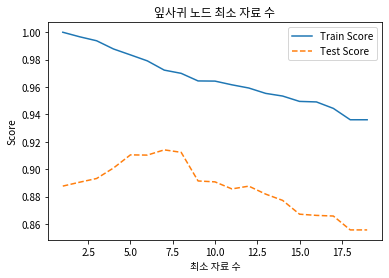

In [164]:
# 표와 그래프를 비교해보았을 때 9, 11를 비교해 보아야 한다고 판단
# 9는 test score가 최대값, 11은 차이가 최소값이어서 선정
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '--', label = 'Test Score')
plt.title('잎사귀 노드 최소 자료 수')
plt.xlabel('최소 자료 수')
plt.ylabel('Score')
plt.legend()

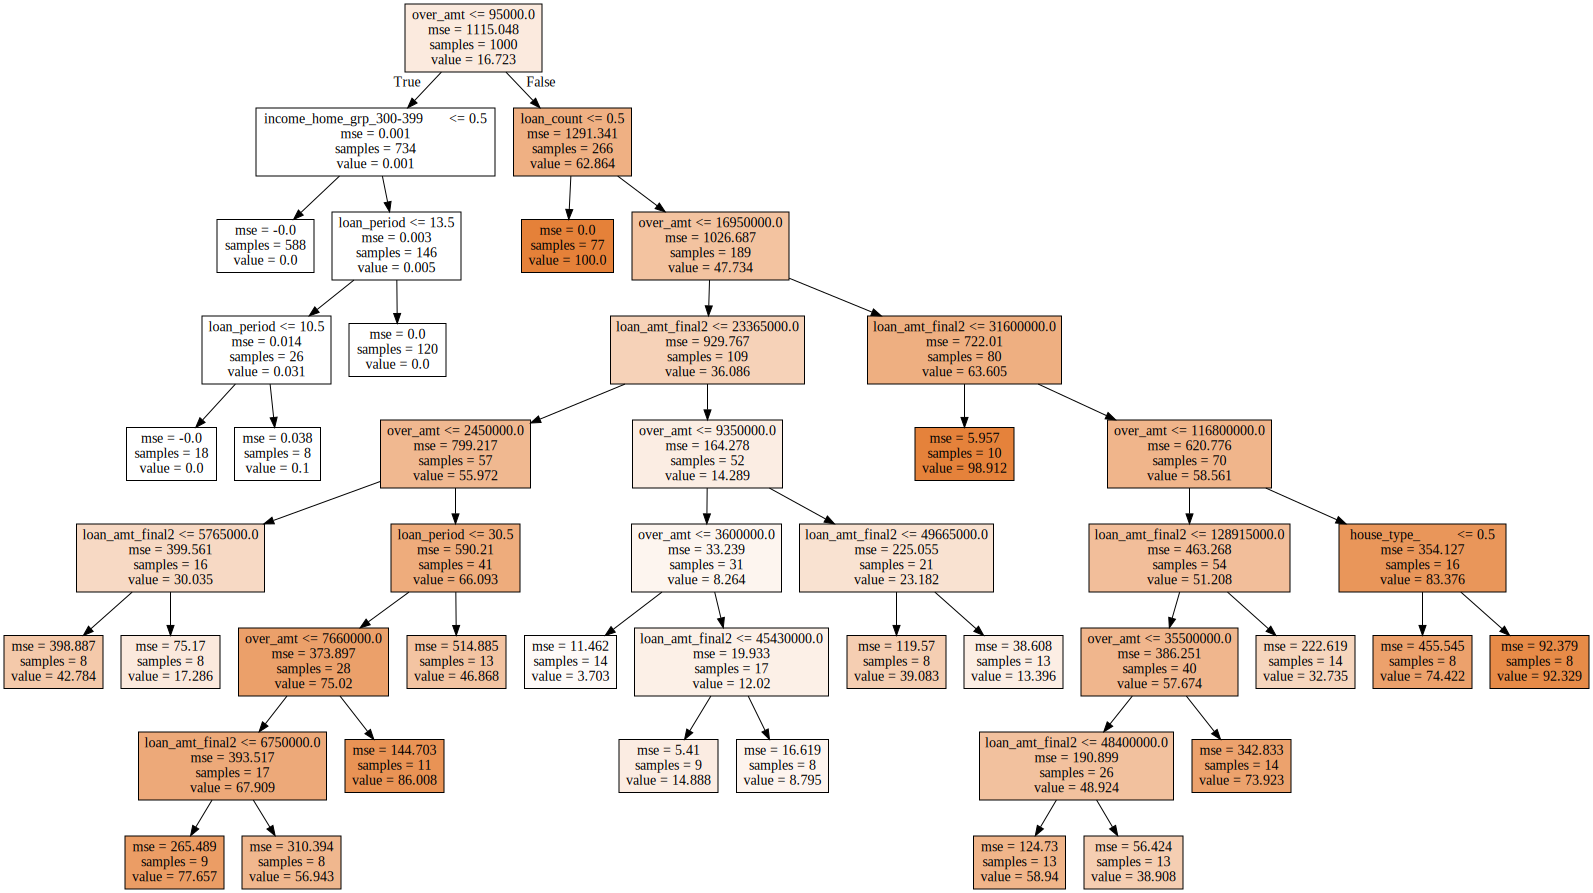

In [165]:
# 노드의 최소 자료 수 = 8
v_feature_name = df_train_x.columns
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 8)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = 'tree_leaf1.dot',
               feature_names = v_feature_name, impurity = True, filled = True)

with open('tree_leaf1.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

(graph, ) = pydot.graph_from_dot_file('tree_leaf1.dot', encoding = 'utf8')
graph.write_png('tree_leaf1.png')

### split

In [166]:
train_score = []; test_score = []
para_split = [n_split * 2 for n_split in range(2,20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 8,
                                min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score
# train과 test 차이 확인하기 위해 diff 변수 추가
df_score_split['diff'] = df_score_split['TrainScore'] - df_score_split['TestScore']
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore,diff
0,4,0.970,0.912,0.058
1,6,0.970,0.912,0.058
2,8,0.970,0.912,0.058
3,10,0.970,0.912,0.058
4,12,0.970,0.912,0.058
5,14,0.970,0.912,0.058
6,16,0.970,0.912,0.058
7,18,0.965,0.892,0.073
8,20,0.965,0.892,0.073
9,22,0.962,0.886,0.076


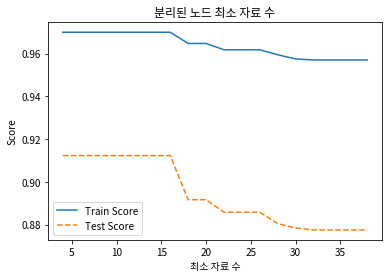

In [167]:
# 분리 노드의 수 12, 24가 적합하다고 판단
# 12는 일정하게 유지되는 값의 중간값이어서 채택, 24는 diff가 약간 줄어들어서 채택
plt.plot(para_split, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '--', label = 'Test Score')
plt.title('분리된 노드 최소 자료 수')
plt.xlabel('최소 자료 수')
plt.ylabel('Score')
plt.legend()

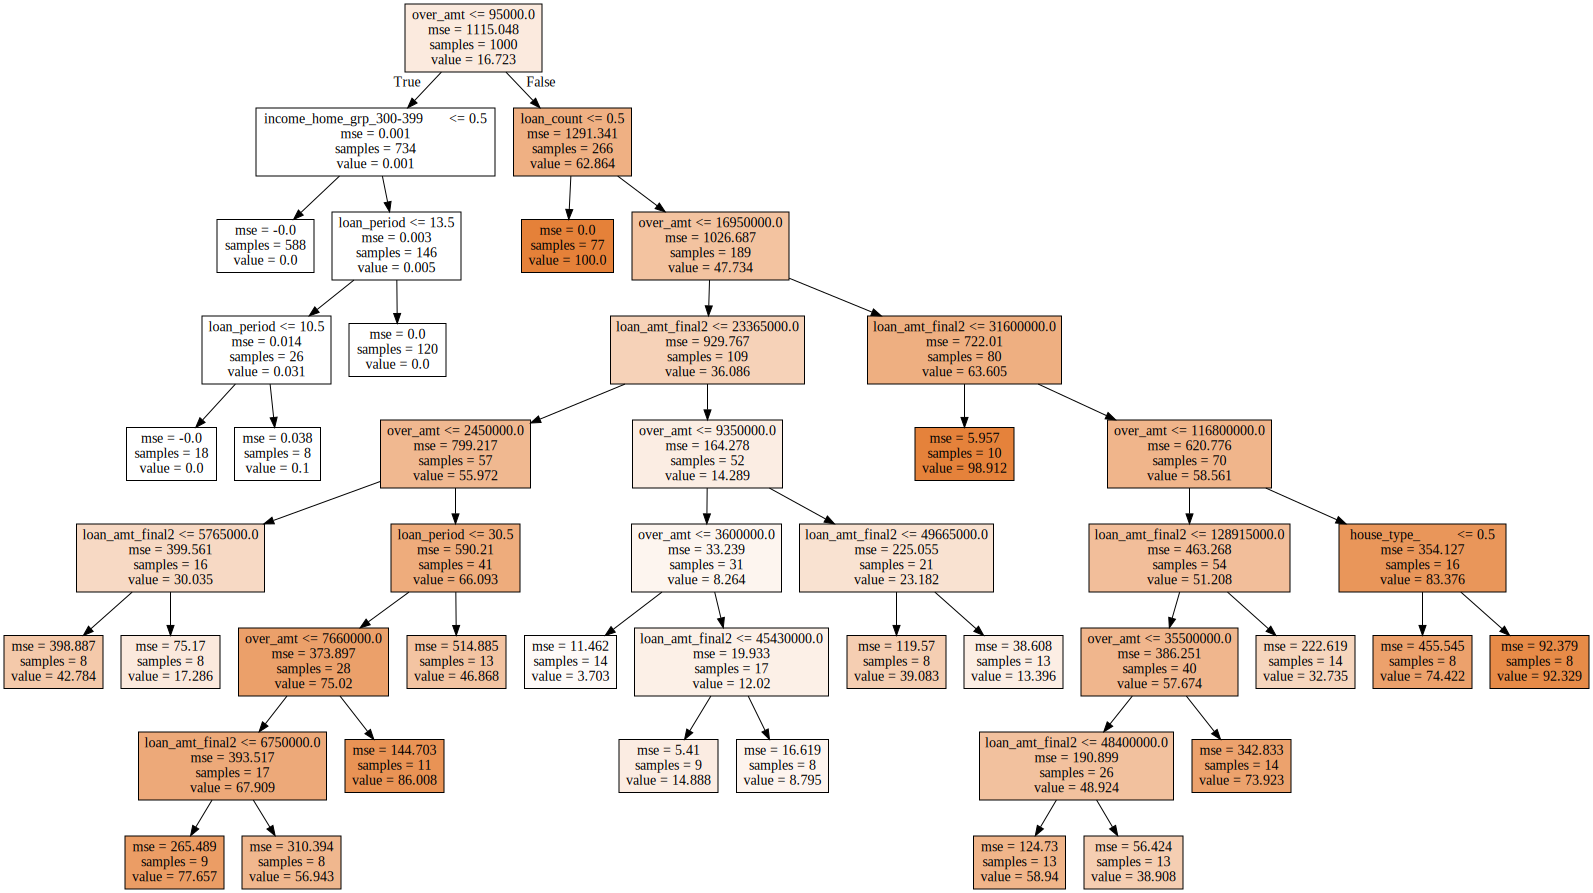

In [168]:
# 분리 노드의 최소 자료수 = 12
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 8,
                                  min_samples_split = 16)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = 'tree_split1.dot',
               feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_split1.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

(graph, ) = pydot.graph_from_dot_file('tree_split1.dot', encoding = 'utf8')
graph.write_png('tree_split1.png')

### max_depth

In [169]:
# 모델 파라미터 조정
train_score=[]; test_score = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(min_samples_leaf= 8, min_samples_split = 16, max_depth = v_max_depth ,random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['MinSamplesLeaf'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score
df_score_depth['diff'] = df_score_depth['TrainScore'] - df_score_depth['TestScore']

df_score_depth.round(3)

,MinSamplesLeaf,TrainScore,TestScore,diff
0,1,0.692,0.647,0.045
1,2,0.826,0.742,0.084
2,3,0.857,0.764,0.094
3,4,0.912,0.814,0.098
4,5,0.940,0.840,0.100
5,6,0.959,0.889,0.070
6,7,0.966,0.901,0.065
7,8,0.970,0.912,0.058
8,9,0.970,0.912,0.058
9,10,0.970,0.912,0.058


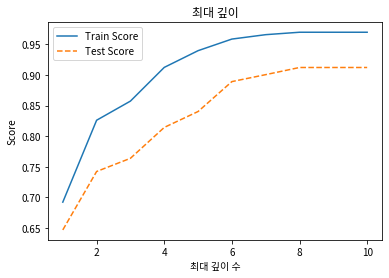

In [171]:
# 깊이 4, 7 적합
# 깊이 4에서 test score 약간 증가, 7에서 차이가 적고 약간 증가하여 채택
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '--', label = 'Test Score')
plt.title('최대 깊이')
plt.xlabel('최대 깊이 수')
plt.ylabel('Score')
plt.legend()

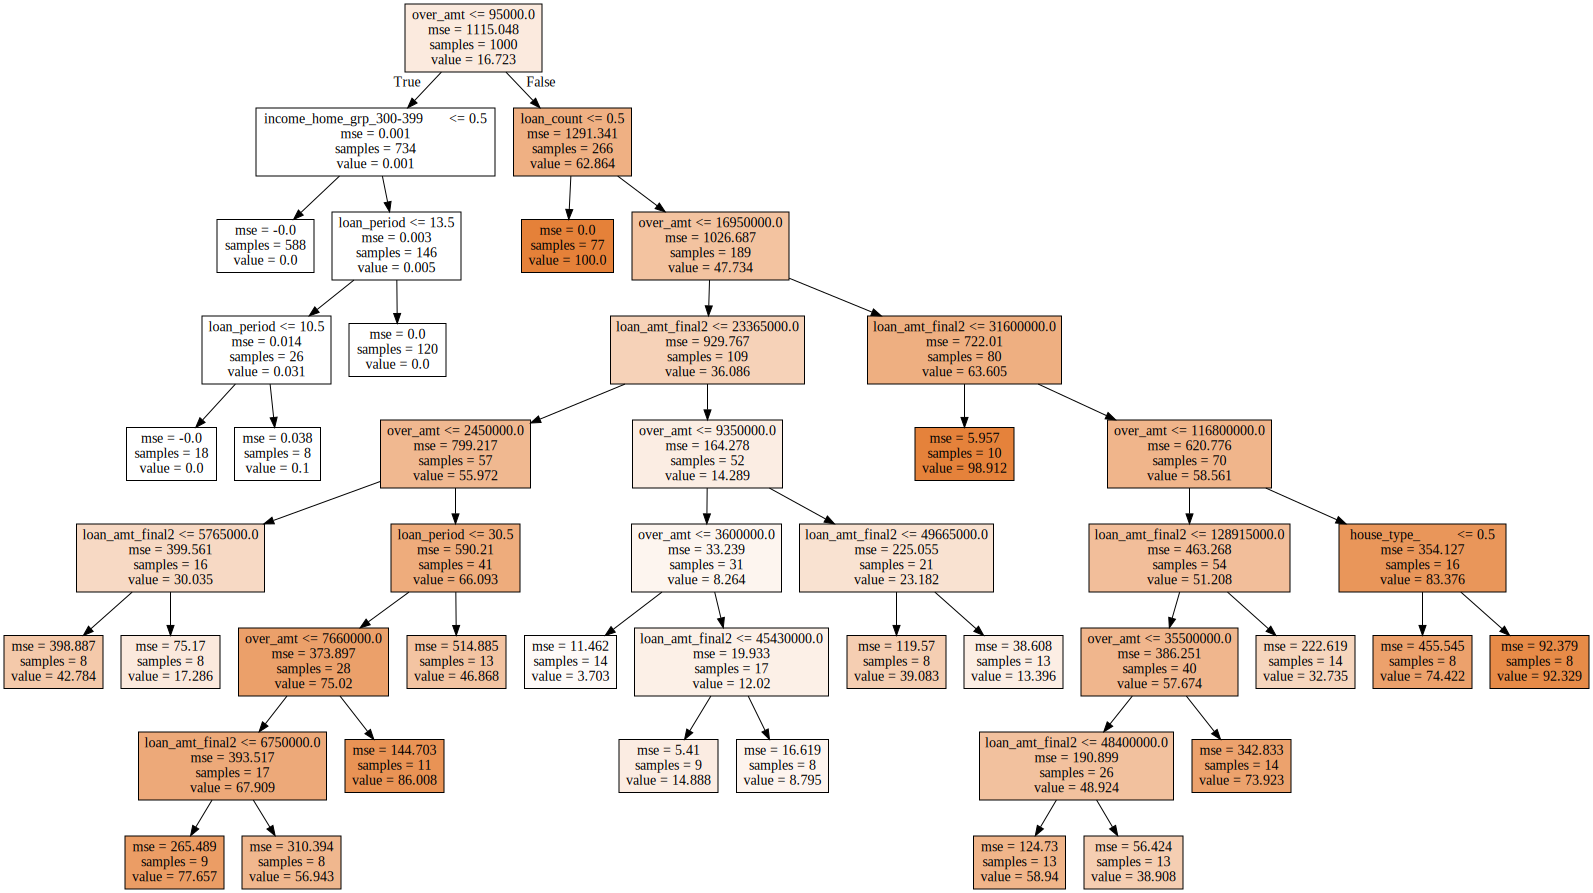

In [172]:
# 최대 깊이 = 4
# 최대 깊이 4,7 끝 노드 value가 비슷하므로 최대 깊이 4 채택
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 8,
                                  min_samples_split = 16, max_depth = 8)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = 'tree_depth1.dot',
               feature_names = v_feature_name, impurity = True, filled = True)
with open('tree_depth1.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

(graph, ) = pydot.graph_from_dot_file('tree_depth1.dot', encoding = 'utf8')
graph.write_png('tree_depth1.png')

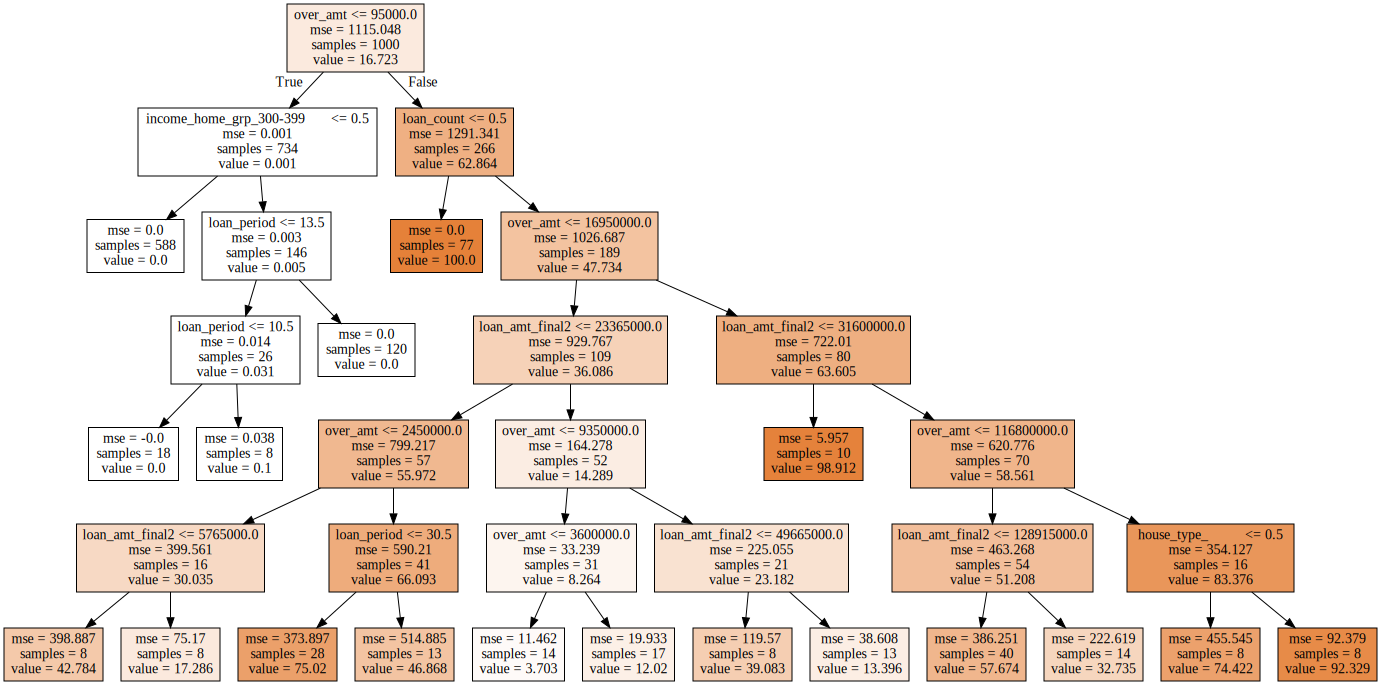

In [133]:
# 최대 깊이 = 7
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 8,
                                  min_samples_split = 16, max_depth = 6)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = 'tree_depth2.dot',
               feature_names = v_feature_name, impurity = True, filled = True)
with open('tree_depth2.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

(graph, ) = pydot.graph_from_dot_file('tree_depth2.dot', encoding = 'utf8')
graph.write_png('tree_depth2.png')

### 결론

In [173]:
tree_final = DecisionTreeRegressor(min_samples_leaf = 8,
                                  min_samples_split = 16, max_depth = 8,random_state = 1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=8, min_samples_split=16,
                      random_state=1234)

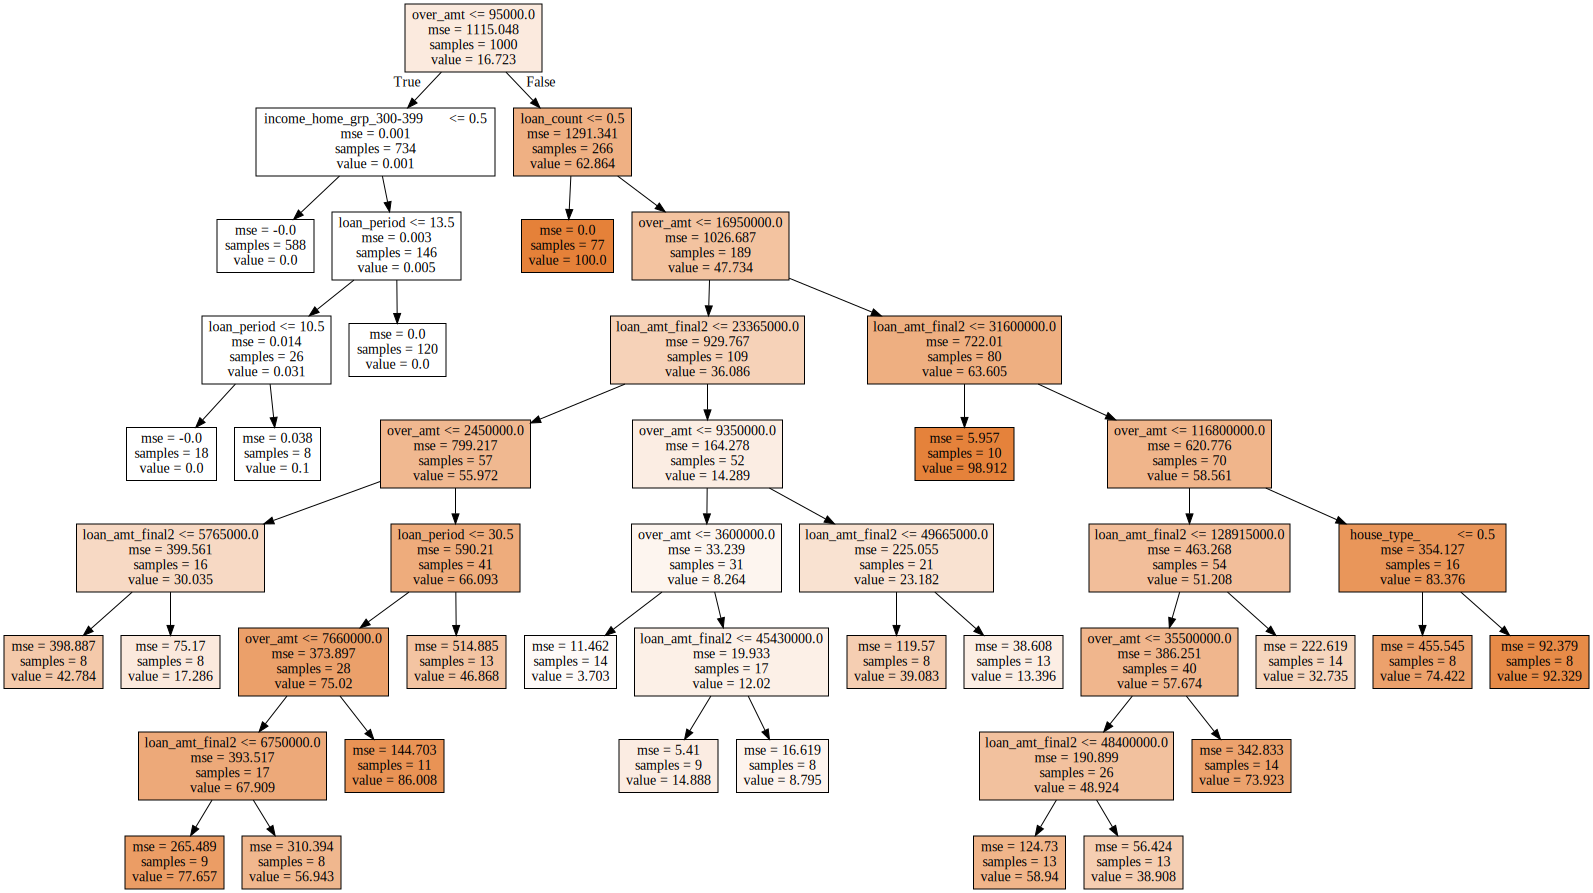

In [174]:
export_graphviz(tree_final, out_file = 'tree_final.dot',
               feature_names = v_feature_name, impurity = True, filled = True)

with open('tree_final.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

(graph, ) = pydot.graph_from_dot_file('tree_final.dot', encoding = 'utf8')
graph.write_png('tree_final.png')

In [175]:
y_pred = tree_final.predict(df_test_x)
print("Train: {:.3f}\n".format(tree_final.score(df_train_x, df_train_y)))
print("Accurancy: {:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))

Train: 0.970

Accurancy: 0.912



In [176]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
8,over_amt,0.782
10,loan_count,0.138
9,loan_amt_final2,0.072
4,loan_period,0.007
46,house_type_아파트,0.001
...,...,...
29,edu_고등학교 졸업,0.000
28,edu_고등학교 재학,0.000
27,job_행정관리/전문직,0.000
26,job_학생(재수생포함),0.000


Text(0, 0.5, '변수')

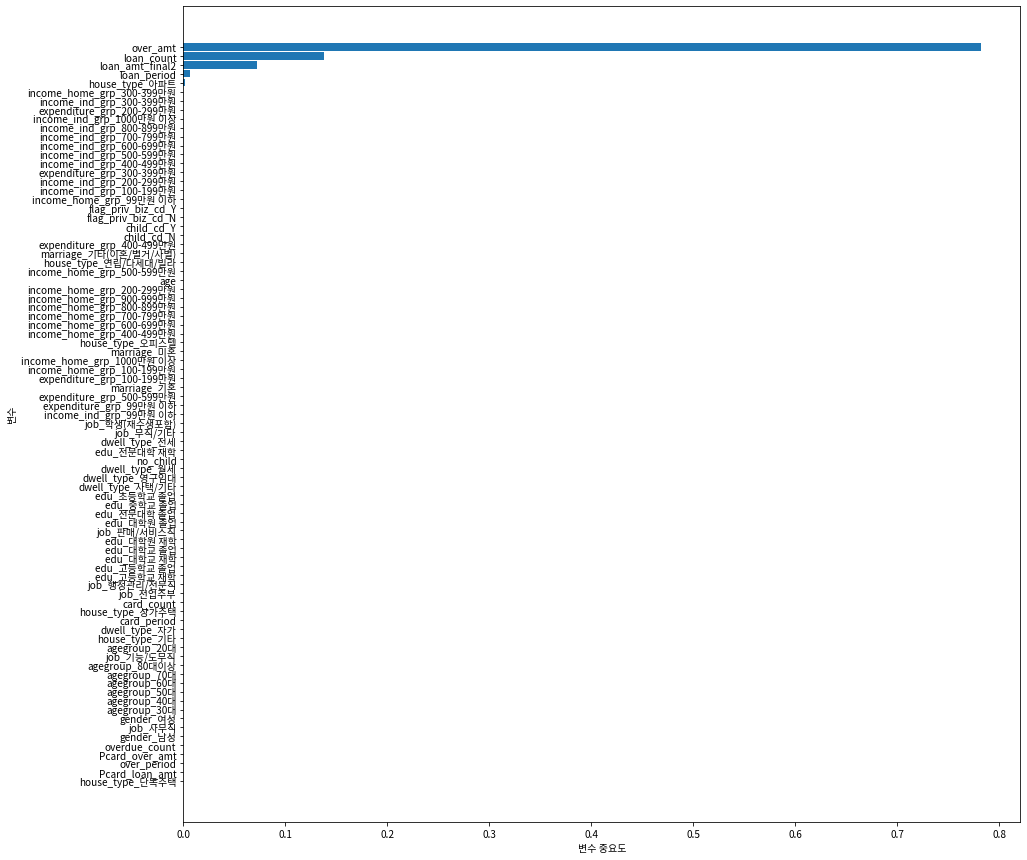

In [177]:
# 중요 변수 결과: age, cement, water 순으로 영향이 크다고 해석
plt.figure(figsize = (15,15))
df_importance.sort_values('Importance', ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

# Decision Tree_비금융

In [178]:
df_all.head()

,gender,age,agegroup,job,edu,dwell_type,house_type,marriage,income_home_grp,expenditure_grp,...,loan_period,Pcard_loan_amt,over_period,Pcard_over_amt,over_amt,loan_amt_final2,del_rate,loan_count,overdue_count,income_ind_grp
0,남성,30,30대,기능/노무직,대학교 졸업,자가,아파트,미혼,900-999만원,100-199만원,...,79.0,0.0,2.0,0.0,5700000.0,70300000.0,8.108108,9.0,1.0,300-399만원
1,여성,66,60대,전업주부,초등학교 졸업,자가,아파트,기혼,200-299만원,99만원 이하,...,6.0,350000.0,0.0,0.0,0.0,3150000.0,0.000000,2.0,0.0,200-299만원
2,남성,43,40대,판매/서비스직,대학교 졸업,자가,아파트,기혼,500-599만원,100-199만원,...,79.0,0.0,0.0,0.0,0.0,391000000.0,0.000000,5.0,0.0,500-599만원
3,남성,28,20대,무직/기타,대학교 졸업,자가,아파트,미혼,500-599만원,99만원 이하,...,5.0,0.0,0.0,0.0,0.0,590000.0,0.000000,2.0,0.0,100-199만원
4,남성,52,50대,행정관리/전문직,대학교 졸업,자가,아파트,기혼,500-599만원,200-299만원,...,40.0,0.0,0.0,0.0,0.0,367200000.0,0.000000,4.0,0.0,300-399만원


In [179]:
df_all.columns

Index(['gender', 'age', 'agegroup', 'job', 'edu', 'dwell_type', 'house_type',
       'marriage', 'income_home_grp', 'expenditure_grp', 'child_cd',
       'no_child', 'flag_priv_biz_cd', 'card_count', 'card_period',
       'loan_period', 'Pcard_loan_amt', 'over_period', 'Pcard_over_amt',
       'over_amt', 'loan_amt_final2', 'del_rate', 'loan_count',
       'overdue_count', 'income_ind_grp'],
      dtype='object')

In [217]:
non_financial = df_all[['gender','age','agegroup', 'job', 'edu', 'dwell_type', 'house_type',
       'marriage', 'income_home_grp', 'expenditure_grp', 'child_cd',
       'no_child', 'flag_priv_biz_cd','del_rate','income_ind_grp']]
non_financial

,gender,age,agegroup,job,edu,dwell_type,house_type,marriage,income_home_grp,expenditure_grp,child_cd,no_child,flag_priv_biz_cd,del_rate,income_ind_grp
0,남성,30,30대,기능/노무직,대학교 졸업,자가,아파트,미혼,900-999만원,100-199만원,N,0,N,8.108108,300-399만원
1,여성,66,60대,전업주부,초등학교 졸업,자가,아파트,기혼,200-299만원,99만원 이하,Y,3,Y,0.000000,200-299만원
2,남성,43,40대,판매/서비스직,대학교 졸업,자가,아파트,기혼,500-599만원,100-199만원,Y,2,N,0.000000,500-599만원
3,남성,28,20대,무직/기타,대학교 졸업,자가,아파트,미혼,500-599만원,99만원 이하,N,0,N,0.000000,100-199만원
4,남성,52,50대,행정관리/전문직,대학교 졸업,자가,아파트,기혼,500-599만원,200-299만원,Y,2,N,0.000000,300-399만원
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,여성,35,30대,사무직,전문대학 졸업,전세,아파트,기혼,500-599만원,99만원 이하,Y,1,N,0.000000,200-299만원
1425,남성,42,40대,기능/노무직,전문대학 졸업,전세,아파트,기혼,300-399만원,100-199만원,Y,2,N,36.764706,100-199만원
1426,여성,39,30대,전업주부,전문대학 졸업,자가,아파트,기혼,300-399만원,100-199만원,Y,1,Y,0.000000,200-299만원
1427,남성,41,40대,사무직,대학교 졸업,자가,단독주택,미혼,300-399만원,100-199만원,N,0,N,0.000000,200-299만원


In [218]:
df_raw_dummy_n = pd.get_dummies(non_financial)
df_raw_dummy_n.head()

,age,no_child,del_rate,gender_남성,gender_여성,agegroup_20대,agegroup_30대,agegroup_40대,agegroup_50대,agegroup_60대,...,income_ind_grp_100-199만원,income_ind_grp_1000만원 이상,income_ind_grp_200-299만원,income_ind_grp_300-399만원,income_ind_grp_400-499만원,income_ind_grp_500-599만원,income_ind_grp_600-699만원,income_ind_grp_700-799만원,income_ind_grp_800-899만원,income_ind_grp_99만원 이하
0,30,0,8.108108,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,66,3,0.000000,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,43,2,0.000000,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,28,0,0.000000,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,52,2,0.000000,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [219]:
df_raw_dummy_n.columns

Index(['age', 'no_child', 'del_rate', 'gender_남성', 'gender_여성', 'agegroup_20대',
       'agegroup_30대', 'agegroup_40대', 'agegroup_50대', 'agegroup_60대',
       'agegroup_70대', 'agegroup_80대이상', 'job_기능/노무직', 'job_무직/기타', 'job_사무직',
       'job_전업주부', 'job_판매/서비스직', 'job_학생(재수생포함)', 'job_행정관리/전문직',
       'edu_고등학교 재학', 'edu_고등학교 졸업', 'edu_대학교 재학', 'edu_대학교 졸업', 'edu_대학원 재학',
       'edu_대학원 졸업', 'edu_전문대학 재학', 'edu_전문대학 졸업', 'edu_중학교 졸업', 'edu_초등학교 졸업',
       'dwell_type_사택/기타', 'dwell_type_영구임대', 'dwell_type_월세', 'dwell_type_자가',
       'dwell_type_전세', 'house_type_기타', 'house_type_단독주택', 'house_type_상가주택',
       'house_type_아파트', 'house_type_연립/다세대/빌라', 'house_type_오피스텔',
       'marriage_기타(이혼/별거/사별)', 'marriage_기혼', 'marriage_미혼',
       'income_home_grp_100-199만원', 'income_home_grp_1000만원 이상',
       'income_home_grp_200-299만원', 'income_home_grp_300-399만원',
       'income_home_grp_400-499만원', 'income_home_grp_500-599만원',
       'income_home_grp_600-699만원', 'income_home_grp_700-799

In [220]:
# 목표변수(del_rate)
df_raw_y = df_raw_dummy_n['del_rate']
df_raw_x = df_raw_dummy_n.drop('del_rate', axis = 1, inplace = False)

In [221]:
df_train_x ,df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               ,test_size = 0.3, random_state = 1234)
print('train_x: {}, train_y: {}'.format(df_train_x.shape, df_train_y.shape))
print('test_x: {}, test_y: {}'.format(df_test_x.shape, df_test_y.shape))

train_x: (1000, 73), train_y: (1000,)
test_x: (429, 73), test_y: (429,)


In [222]:
# 파라미터 조정 전 train, test score
# train 1에 근사하므로 과적합
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)
print('Score on training set:{:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('Score on test set:{:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set:0.754
Score on test set:-0.514


### leaf

In [223]:
# 잎사귀 노드의 최소 자료 수 선정
train_score = []; test_score = []

para_leaf = [n_leaf*1 for n_leaf in range(1,50)]  # 자료 수는 1개씩 증가

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state = 1234, 
                                min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score
# TrainScore와 TestScore의 차이 열 추가
df_score_leaf['diff'] = df_score_leaf['TrainScore'] - df_score_leaf['TestScore']
df_score_leaf

,MinSamplesLeaf,TrainScore,TestScore,diff
0,1,0.753893,-0.514123,1.268016
1,2,0.582365,-0.398591,0.980955
2,3,0.455513,-0.319903,0.775416
3,4,0.368183,-0.231218,0.599401
4,5,0.301001,-0.208316,0.509317
5,6,0.278198,-0.180406,0.458603
6,7,0.244034,-0.149917,0.393950
7,8,0.227519,-0.130271,0.357791
8,9,0.218272,-0.159660,0.377931
9,10,0.209656,-0.148069,0.357725


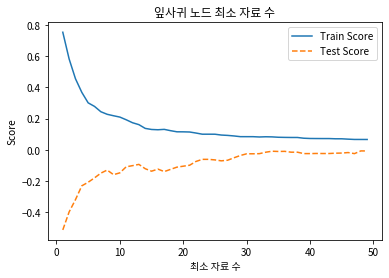

In [224]:
# 표와 그래프를 비교해보았을 때 9, 11를 비교해 보아야 한다고 판단
# 9는 test score가 최대값, 11은 차이가 최소값이어서 선정
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '--', label = 'Test Score')
plt.title('잎사귀 노드 최소 자료 수')
plt.xlabel('최소 자료 수')
plt.ylabel('Score')
plt.legend()

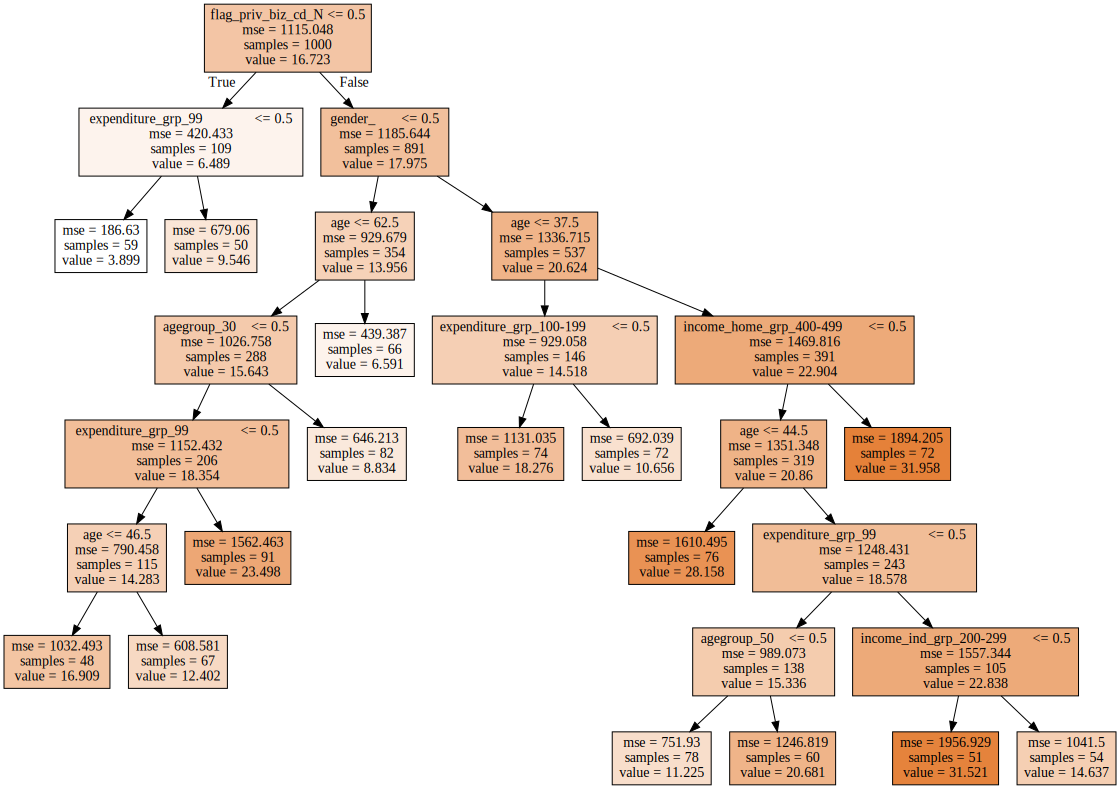

In [226]:
# 노드의 최소 자료 수 = 8
v_feature_name = df_train_x.columns
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 48)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = 'tree_leaf1.dot',
               feature_names = v_feature_name, impurity = True, filled = True)

with open('tree_leaf1.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

(graph, ) = pydot.graph_from_dot_file('tree_leaf1.dot', encoding = 'utf8')
graph.write_png('tree_leaf1.png')

### split

In [227]:
train_score = []; test_score = []
para_split = [n_split * 2 for n_split in range(2,20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 48,
                                min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score
# train과 test 차이 확인하기 위해 diff 변수 추가
df_score_split['diff'] = df_score_split['TrainScore'] - df_score_split['TestScore']
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore,diff
0,4,0.066,-0.007,0.073
1,6,0.066,-0.007,0.073
2,8,0.066,-0.007,0.073
3,10,0.066,-0.007,0.073
4,12,0.066,-0.007,0.073
5,14,0.066,-0.007,0.073
6,16,0.066,-0.007,0.073
7,18,0.066,-0.007,0.073
8,20,0.066,-0.007,0.073
9,22,0.066,-0.007,0.073


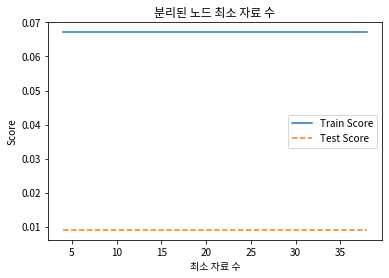

In [204]:
# 분리 노드의 수 12, 24가 적합하다고 판단
# 12는 일정하게 유지되는 값의 중간값이어서 채택, 24는 diff가 약간 줄어들어서 채택
plt.plot(para_split, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '--', label = 'Test Score')
plt.title('분리된 노드 최소 자료 수')
plt.xlabel('최소 자료 수')
plt.ylabel('Score')
plt.legend()

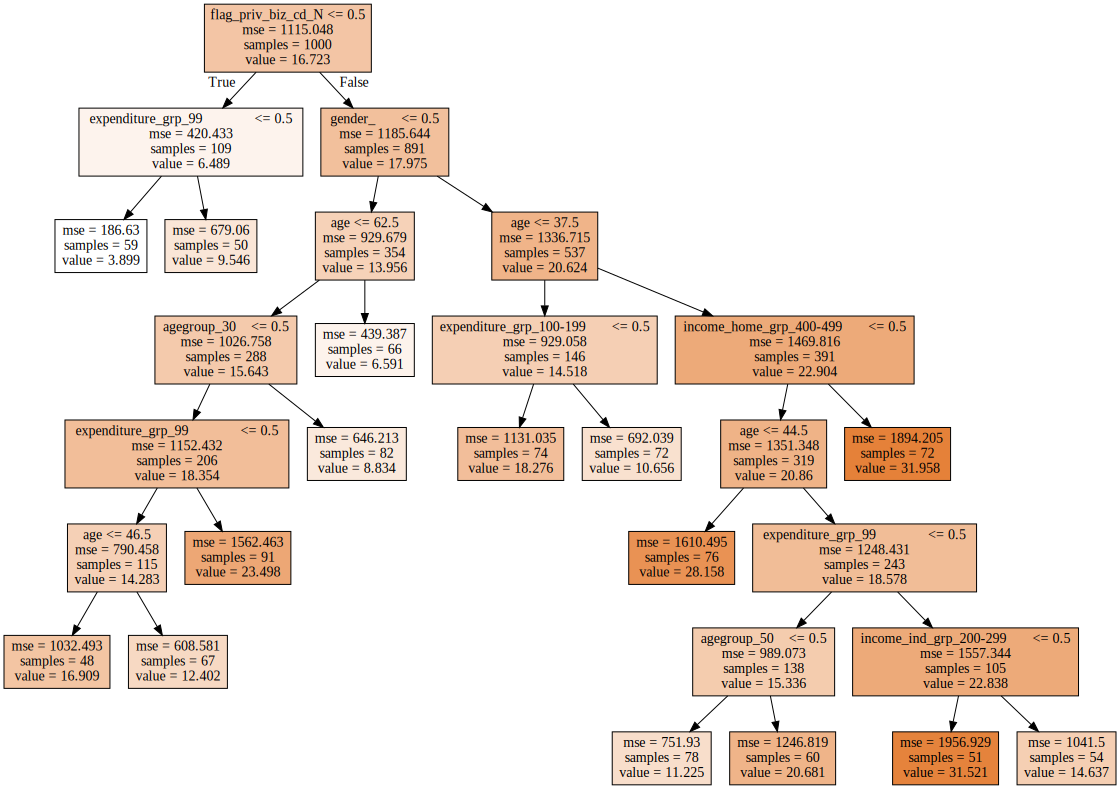

In [228]:
# 분리 노드의 최소 자료수 = 12
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 48,
                                  min_samples_split = 10)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = 'tree_split1.dot',
               feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_split1.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

(graph, ) = pydot.graph_from_dot_file('tree_split1.dot', encoding = 'utf8')
graph.write_png('tree_split1.png')

### max_depth

In [229]:
# 모델 파라미터 조정
train_score=[]; test_score = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(min_samples_leaf= 48, min_samples_split = 10, max_depth = v_max_depth ,random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['MinSamplesLeaf'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score
df_score_depth['diff'] = df_score_depth['TrainScore'] - df_score_depth['TestScore']

df_score_depth.round(3)

,MinSamplesLeaf,TrainScore,TestScore,diff
0,1,0.011,0.013,-0.001
1,2,0.021,0.016,0.005
2,3,0.031,0.007,0.025
3,4,0.045,-0.012,0.056
4,5,0.053,-0.028,0.081
5,6,0.057,-0.019,0.075
6,7,0.066,-0.007,0.073
7,8,0.066,-0.007,0.073
8,9,0.066,-0.007,0.073
9,10,0.066,-0.007,0.073


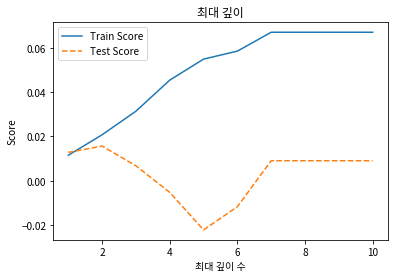

In [209]:
# 깊이 4, 7 적합
# 깊이 4에서 test score 약간 증가, 7에서 차이가 적고 약간 증가하여 채택
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '--', label = 'Test Score')
plt.title('최대 깊이')
plt.xlabel('최대 깊이 수')
plt.ylabel('Score')
plt.legend()

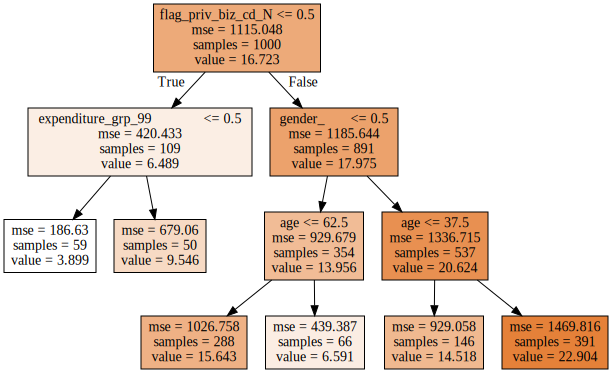

In [230]:
# 최대 깊이 = 4
# 최대 깊이 4,7 끝 노드 value가 비슷하므로 최대 깊이 4 채택
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 48,
                                  min_samples_split = 10, max_depth = 3)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = 'tree_depth1.dot',
               feature_names = v_feature_name, impurity = True, filled = True)
with open('tree_depth1.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

(graph, ) = pydot.graph_from_dot_file('tree_depth1.dot', encoding = 'utf8')
graph.write_png('tree_depth1.png')

### 결론

In [231]:
tree_final = DecisionTreeRegressor(min_samples_leaf = 48,
                                  min_samples_split = 10, max_depth = 3,random_state = 1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=48, min_samples_split=10,
                      random_state=1234)

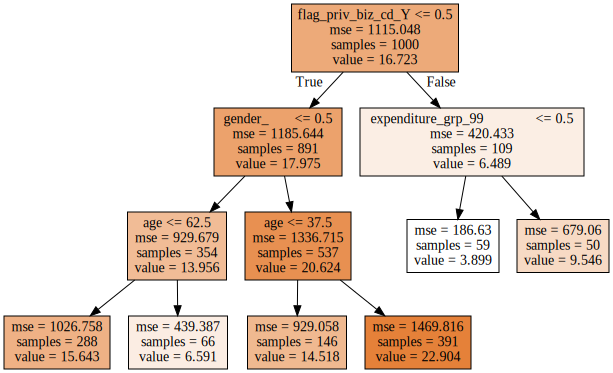

In [212]:
export_graphviz(tree_final, out_file = 'tree_final.dot',
               feature_names = v_feature_name, impurity = True, filled = True)

with open('tree_final.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

(graph, ) = pydot.graph_from_dot_file('tree_final.dot', encoding = 'utf8')
graph.write_png('tree_final.png')

In [232]:
y_pred = tree_final.predict(df_test_x)
print("Train: {:.3f}\n".format(tree_final.score(df_train_x, df_train_y)))
print("Accurancy: {:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))

Train: 0.031

Accurancy: 0.007



In [233]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
61,flag_priv_biz_cd_N,0.366
0,age,0.339
2,gender_남성,0.271
58,expenditure_grp_99만원 이하,0.025
47,income_home_grp_500-599만원,0.000
...,...,...
24,edu_전문대학 재학,0.000
23,edu_대학원 졸업,0.000
22,edu_대학원 재학,0.000
21,edu_대학교 졸업,0.000


Text(0, 0.5, '변수')

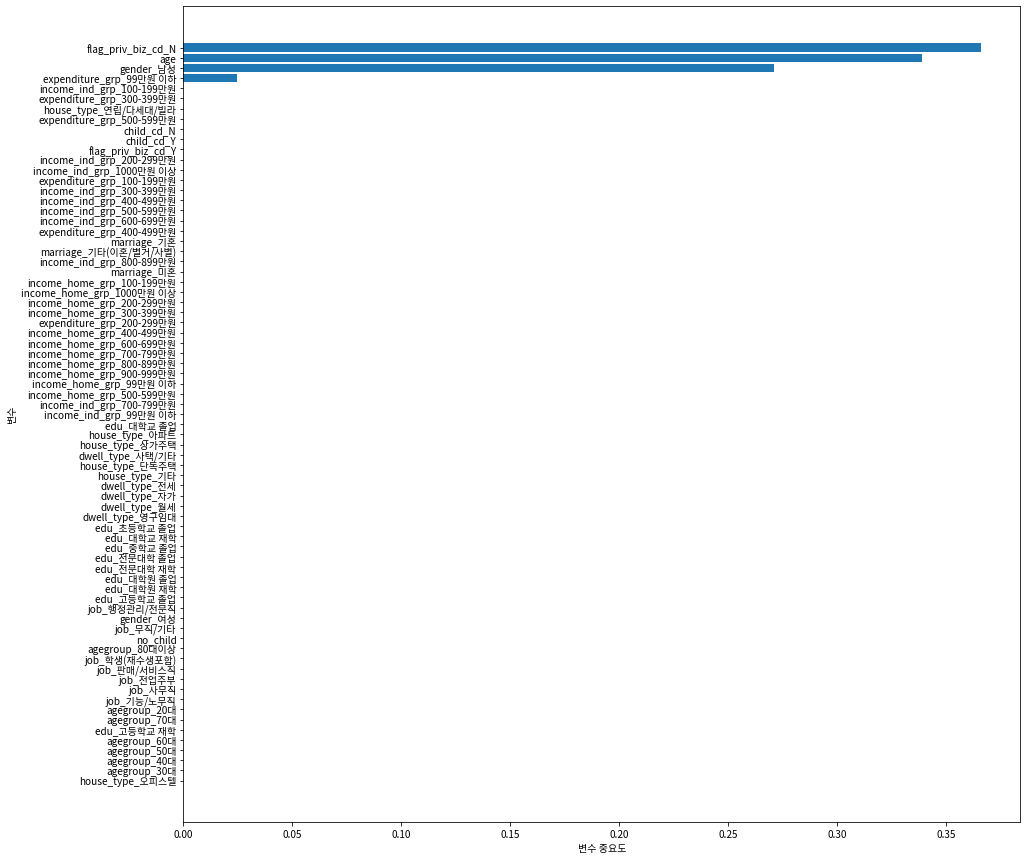

In [234]:
# 중요 변수 결과: age, cement, water 순으로 영향이 크다고 해석
plt.figure(figsize = (15,15))
df_importance.sort_values('Importance', ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

# Decision Tree_금융

In [253]:
df_all.columns

Index(['gender', 'age', 'agegroup', 'job', 'edu', 'dwell_type', 'house_type',
       'marriage', 'income_home_grp', 'expenditure_grp', 'child_cd',
       'no_child', 'flag_priv_biz_cd', 'card_count', 'card_period',
       'loan_period', 'Pcard_loan_amt', 'over_period', 'Pcard_over_amt',
       'over_amt', 'loan_amt_final2', 'del_rate', 'loan_count',
       'overdue_count', 'income_ind_grp'],
      dtype='object')

In [254]:
financial = df_all[['card_count', 'card_period',
       'loan_period', 'Pcard_loan_amt', 'over_period', 'Pcard_over_amt',
       'over_amt', 'loan_amt_final2', 'del_rate', 'loan_count',
       'overdue_count']]
financial

,card_count,card_period,loan_period,Pcard_loan_amt,over_period,Pcard_over_amt,over_amt,loan_amt_final2,del_rate,loan_count,overdue_count
0,4.0,99.0,79.0,0.0,2.0,0.0,5700000.0,70300000.0,8.108108,9.0,1.0
1,6.0,126.0,6.0,350000.0,0.0,0.0,0.0,3150000.0,0.000000,2.0,0.0
2,2.0,50.0,79.0,0.0,0.0,0.0,0.0,391000000.0,0.000000,5.0,0.0
3,1.0,25.0,5.0,0.0,0.0,0.0,0.0,590000.0,0.000000,2.0,0.0
4,3.0,75.0,40.0,0.0,0.0,0.0,0.0,367200000.0,0.000000,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1424,0.0,0.0,17.0,0.0,0.0,0.0,0.0,7900000.0,0.000000,2.0,0.0
1425,0.0,0.0,25.0,0.0,6.0,0.0,500000.0,1360000.0,36.764706,1.0,1.0
1426,5.0,118.0,150.0,16600000.0,0.0,0.0,0.0,61340000.0,0.000000,17.0,0.0
1427,1.0,25.0,29.0,0.0,0.0,0.0,0.0,68000000.0,0.000000,2.0,0.0


In [255]:
df_raw_dummy = pd.get_dummies(financial)
df_raw_dummy.head()

,card_count,card_period,loan_period,Pcard_loan_amt,over_period,Pcard_over_amt,over_amt,loan_amt_final2,del_rate,loan_count,overdue_count
0,4.0,99.0,79.0,0.0,2.0,0.0,5700000.0,70300000.0,8.108108,9.0,1.0
1,6.0,126.0,6.0,350000.0,0.0,0.0,0.0,3150000.0,0.000000,2.0,0.0
2,2.0,50.0,79.0,0.0,0.0,0.0,0.0,391000000.0,0.000000,5.0,0.0
3,1.0,25.0,5.0,0.0,0.0,0.0,0.0,590000.0,0.000000,2.0,0.0
4,3.0,75.0,40.0,0.0,0.0,0.0,0.0,367200000.0,0.000000,4.0,0.0


In [256]:
df_raw_dummy.columns

Index(['card_count', 'card_period', 'loan_period', 'Pcard_loan_amt',
       'over_period', 'Pcard_over_amt', 'over_amt', 'loan_amt_final2',
       'del_rate', 'loan_count', 'overdue_count'],
      dtype='object')

In [257]:
# 목표변수(del_rate)
df_raw_y = df_raw_dummy['del_rate']
df_raw_x = df_raw_dummy.drop('del_rate', axis = 1, inplace = False)

In [258]:
df_train_x ,df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               ,test_size = 0.3, random_state = 1234)
print('train_x: {}, train_y: {}'.format(df_train_x.shape, df_train_y.shape))
print('test_x: {}, test_y: {}'.format(df_test_x.shape, df_test_y.shape))

train_x: (1000, 10), train_y: (1000,)
test_x: (429, 10), test_y: (429,)


In [259]:
# 파라미터 조정 전 train, test score
# train 1에 근사하므로 과적합
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)
print('Score on training set:{:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('Score on test set:{:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set:1.000
Score on test set:0.916


### leaf

In [260]:
# 잎사귀 노드의 최소 자료 수 선정
train_score = []; test_score = []

para_leaf = [n_leaf*1 for n_leaf in range(1,20)]  # 자료 수는 1개씩 증가

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state = 1234, 
                                min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score
# TrainScore와 TestScore의 차이 열 추가
df_score_leaf['diff'] = df_score_leaf['TrainScore'] - df_score_leaf['TestScore']
df_score_leaf

,MinSamplesLeaf,TrainScore,TestScore,diff
0,1,1.000000,0.915993,0.084007
1,2,0.995842,0.916317,0.079525
2,3,0.990591,0.911514,0.079077
3,4,0.986657,0.918003,0.068654
4,5,0.982408,0.918049,0.064359
5,6,0.978286,0.911973,0.066313
6,7,0.971655,0.915048,0.056608
7,8,0.969056,0.911991,0.057065
8,9,0.964438,0.891388,0.073050
9,10,0.964316,0.890727,0.073590


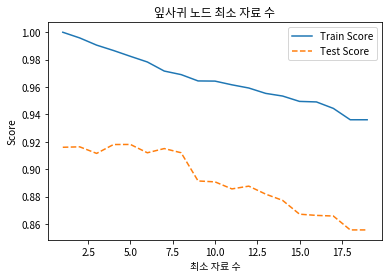

In [261]:
# 표와 그래프를 비교해보았을 때 9, 11를 비교해 보아야 한다고 판단
# 9는 test score가 최대값, 11은 차이가 최소값이어서 선정
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '--', label = 'Test Score')
plt.title('잎사귀 노드 최소 자료 수')
plt.xlabel('최소 자료 수')
plt.ylabel('Score')
plt.legend()

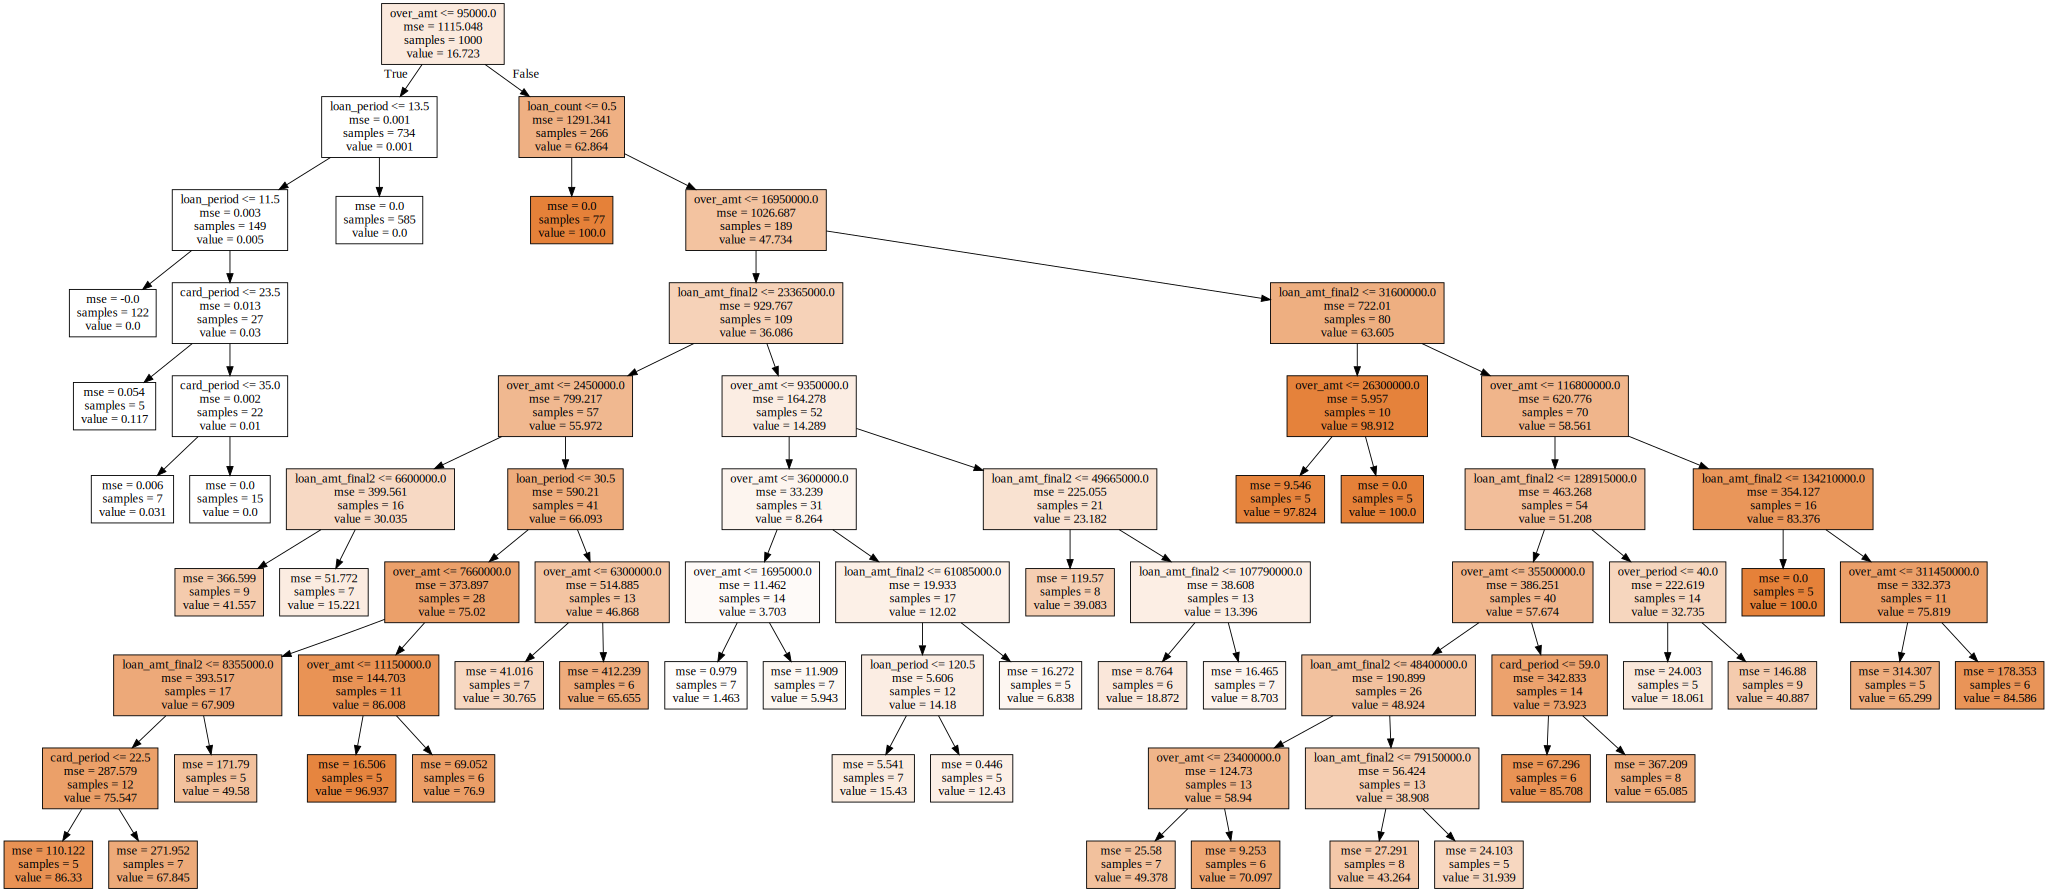

In [262]:
# 노드의 최소 자료 수 = 8
v_feature_name = df_train_x.columns
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 5)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = 'tree_leaf1.dot',
               feature_names = v_feature_name, impurity = True, filled = True)

with open('tree_leaf1.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

(graph, ) = pydot.graph_from_dot_file('tree_leaf1.dot', encoding = 'utf8')
graph.write_png('tree_leaf1.png')

### split

In [263]:
train_score = []; test_score = []
para_split = [n_split * 2 for n_split in range(2,20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 5,
                                min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score
# train과 test 차이 확인하기 위해 diff 변수 추가
df_score_split['diff'] = df_score_split['TrainScore'] - df_score_split['TestScore']
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore,diff
0,4,0.982,0.918,0.064
1,6,0.982,0.918,0.064
2,8,0.982,0.918,0.064
3,10,0.982,0.918,0.064
4,12,0.981,0.917,0.063
5,14,0.974,0.908,0.066
6,16,0.971,0.913,0.059
7,18,0.965,0.892,0.073
8,20,0.965,0.892,0.073
9,22,0.962,0.886,0.076


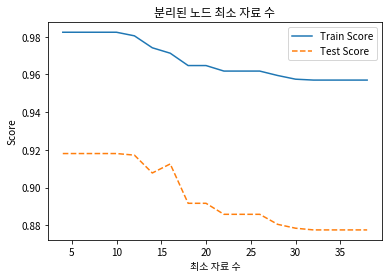

In [264]:
# 분리 노드의 수 12, 24가 적합하다고 판단
# 12는 일정하게 유지되는 값의 중간값이어서 채택, 24는 diff가 약간 줄어들어서 채택
plt.plot(para_split, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '--', label = 'Test Score')
plt.title('분리된 노드 최소 자료 수')
plt.xlabel('최소 자료 수')
plt.ylabel('Score')
plt.legend()

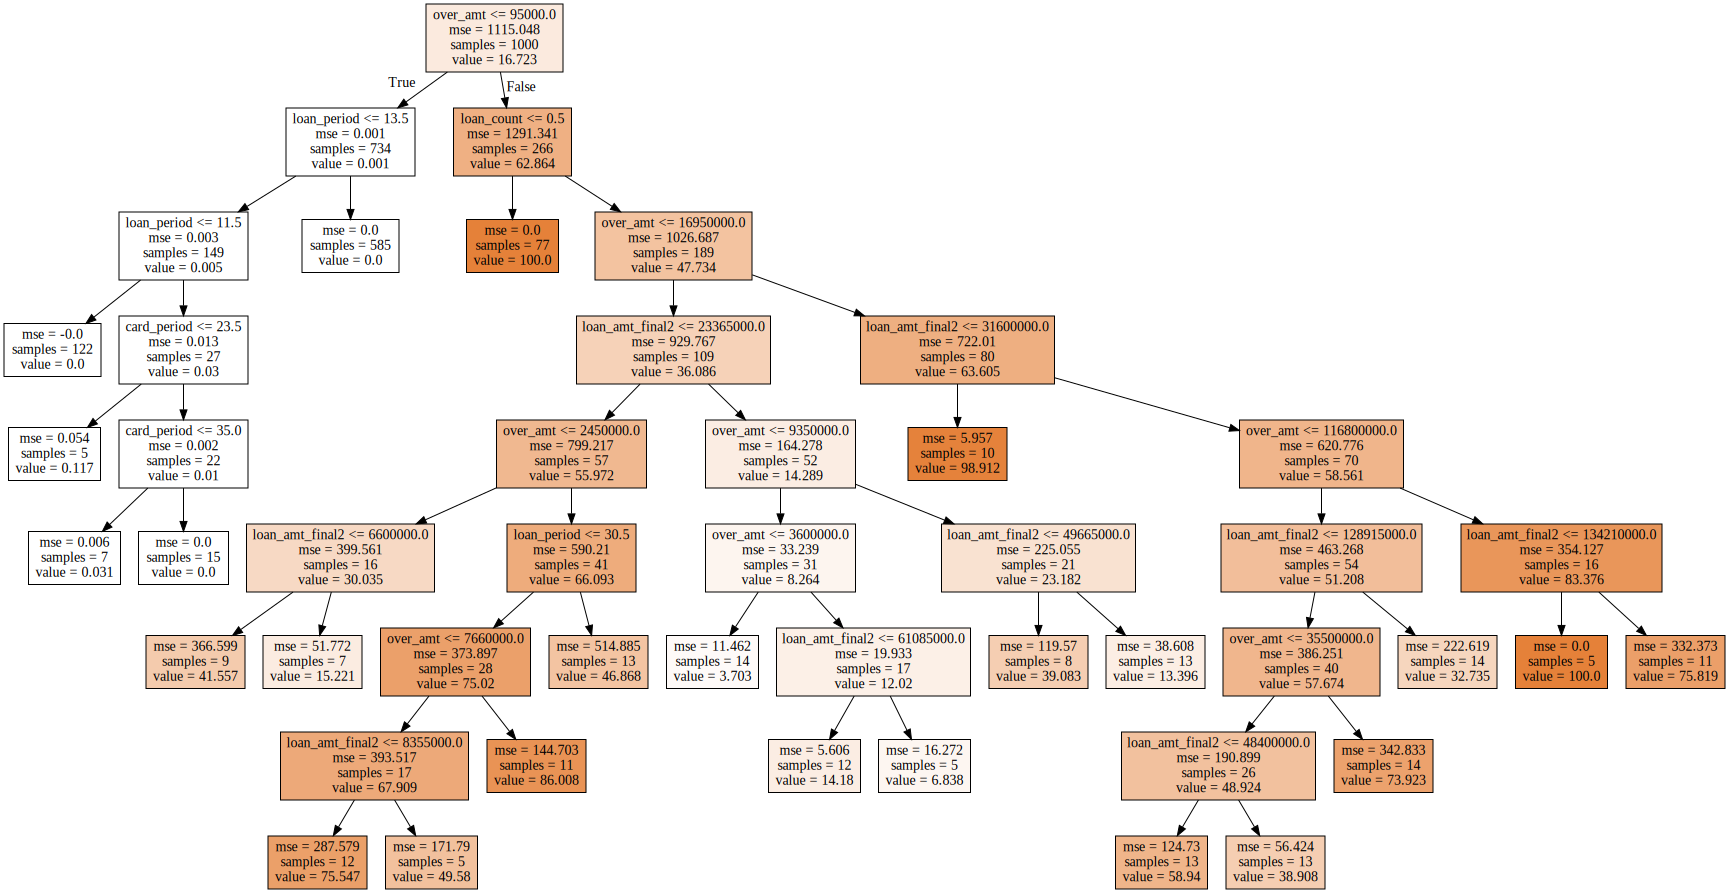

In [265]:
# 분리 노드의 최소 자료수 = 12
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 5,
                                  min_samples_split = 16)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = 'tree_split1.dot',
               feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_split1.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

(graph, ) = pydot.graph_from_dot_file('tree_split1.dot', encoding = 'utf8')
graph.write_png('tree_split1.png')

### max_depth

In [266]:
# 모델 파라미터 조정
train_score=[]; test_score = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(min_samples_leaf= 5, min_samples_split = 16, max_depth = v_max_depth ,random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['MinSamplesLeaf'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score
df_score_depth['diff'] = df_score_depth['TrainScore'] - df_score_depth['TestScore']

df_score_depth.round(3)

,MinSamplesLeaf,TrainScore,TestScore,diff
0,1,0.692,0.647,0.045
1,2,0.826,0.742,0.084
2,3,0.857,0.764,0.094
3,4,0.912,0.814,0.098
4,5,0.940,0.840,0.100
5,6,0.960,0.889,0.071
6,7,0.967,0.900,0.067
7,8,0.971,0.913,0.059
8,9,0.971,0.913,0.059
9,10,0.971,0.913,0.059


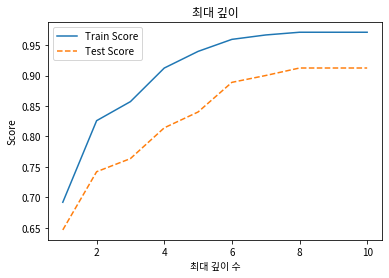

In [267]:
# 깊이 4, 7 적합
# 깊이 4에서 test score 약간 증가, 7에서 차이가 적고 약간 증가하여 채택
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '--', label = 'Test Score')
plt.title('최대 깊이')
plt.xlabel('최대 깊이 수')
plt.ylabel('Score')
plt.legend()

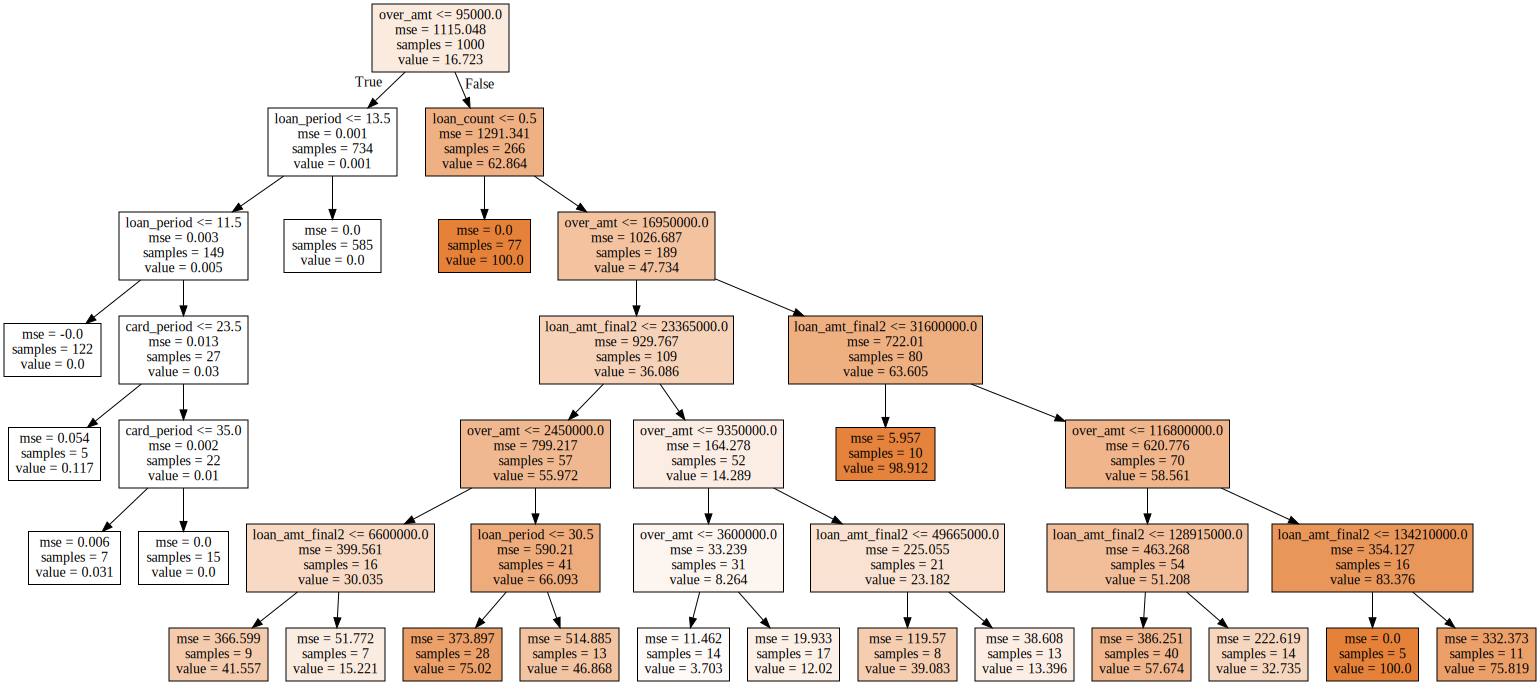

In [268]:
# 최대 깊이 = 4
# 최대 깊이 4,7 끝 노드 value가 비슷하므로 최대 깊이 4 채택
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 5,
                                  min_samples_split = 16, max_depth = 6)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = 'tree_depth1.dot',
               feature_names = v_feature_name, impurity = True, filled = True)
with open('tree_depth1.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

(graph, ) = pydot.graph_from_dot_file('tree_depth1.dot', encoding = 'utf8')
graph.write_png('tree_depth1.png')

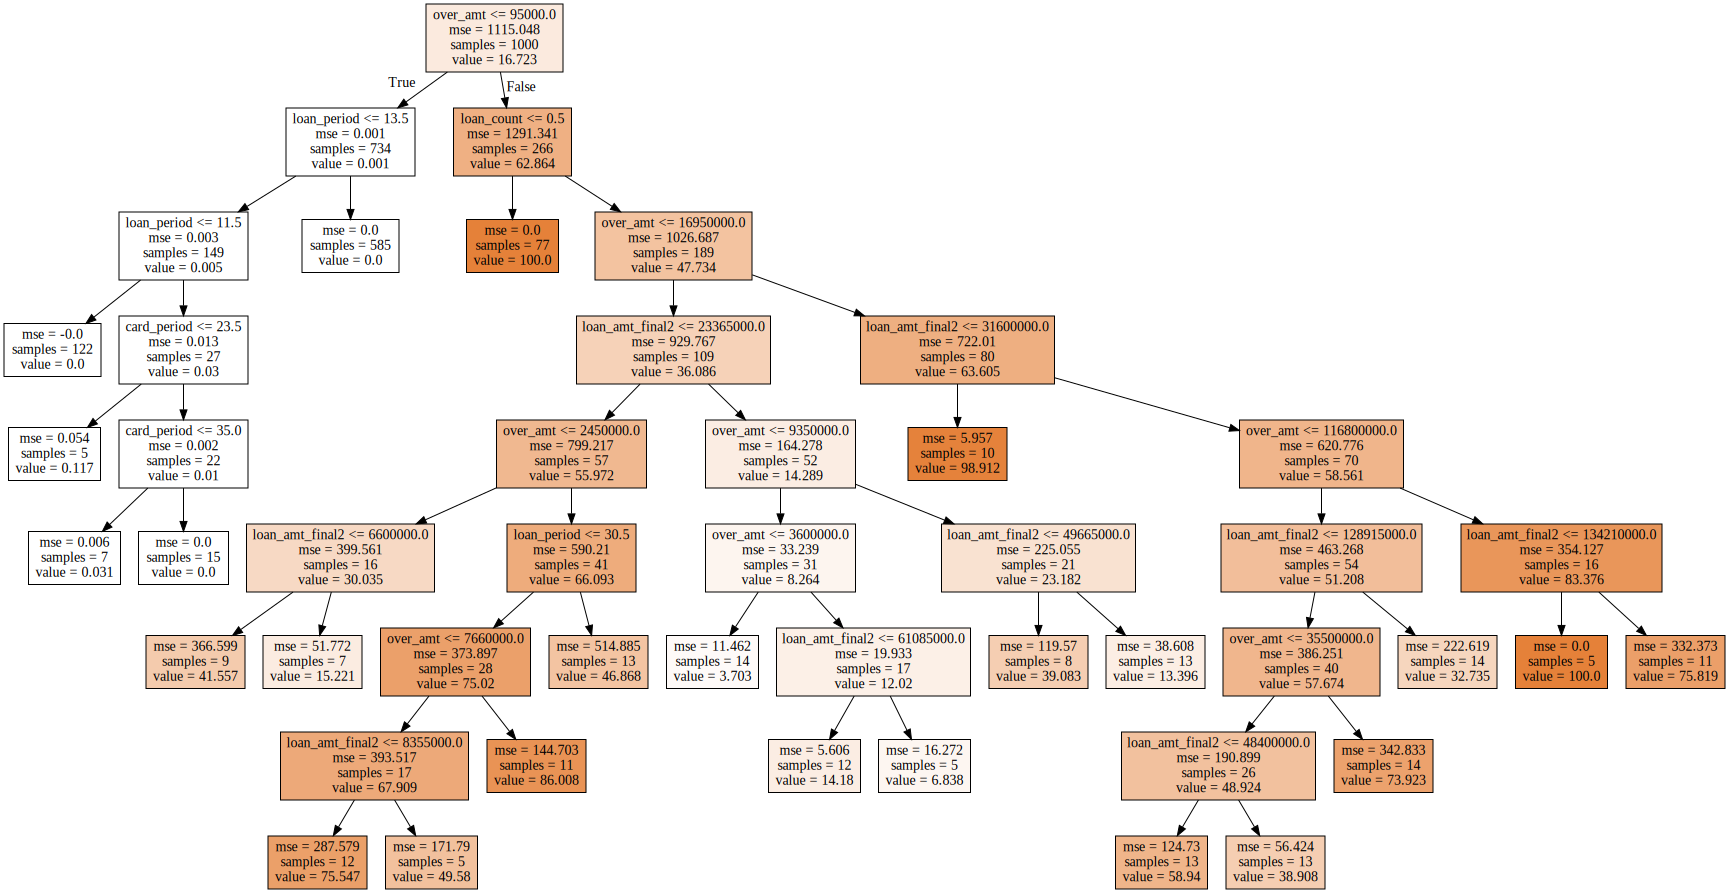

In [270]:
# 최대 깊이 = 4
# 최대 깊이 4,7 끝 노드 value가 비슷하므로 최대 깊이 4 채택
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 5,
                                  min_samples_split = 16, max_depth = 8)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = 'tree_depth1.dot',
               feature_names = v_feature_name, impurity = True, filled = True)
with open('tree_depth1.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

(graph, ) = pydot.graph_from_dot_file('tree_depth1.dot', encoding = 'utf8')
graph.write_png('tree_depth1.png')

### 결론_1

In [271]:
tree_final = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 5,
                                  min_samples_split = 16, max_depth = 6)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=5, min_samples_split=16,
                      random_state=1234)

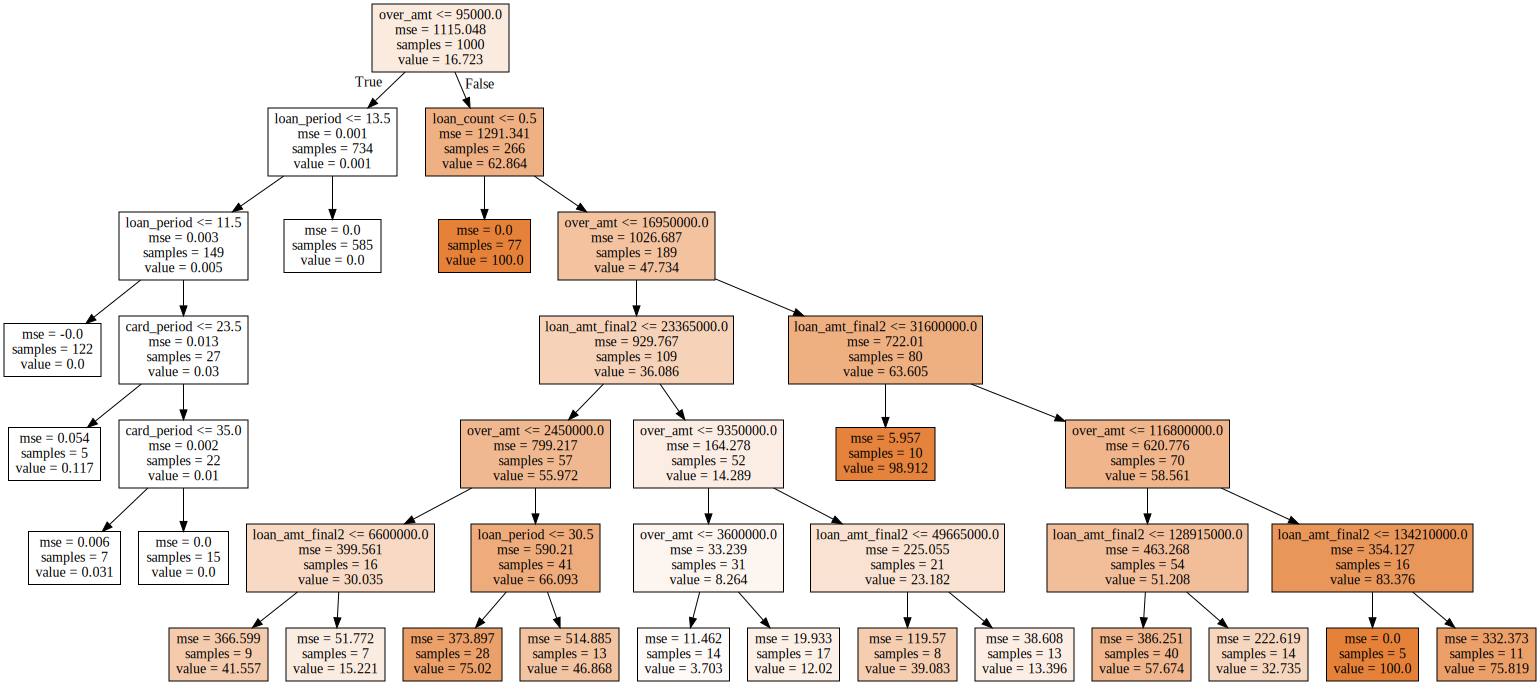

In [272]:
export_graphviz(tree_final, out_file = 'tree_final.dot',
               feature_names = v_feature_name, impurity = True, filled = True)

with open('tree_final.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

(graph, ) = pydot.graph_from_dot_file('tree_final.dot', encoding = 'utf8')
graph.write_png('tree_final.png')

In [273]:
y_pred = tree_final.predict(df_test_x)
print("Train: {:.3f}\n".format(tree_final.score(df_train_x, df_train_y)))
print("Accurancy: {:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))

Train: 0.960

Accurancy: 0.889



In [274]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
6,over_amt,0.783
8,loan_count,0.140
7,loan_amt_final2,0.071
2,loan_period,0.007
1,card_period,0.000
0,card_count,0.000
3,Pcard_loan_amt,0.000
4,over_period,0.000
5,Pcard_over_amt,0.000
9,overdue_count,0.000


Text(0, 0.5, '변수')

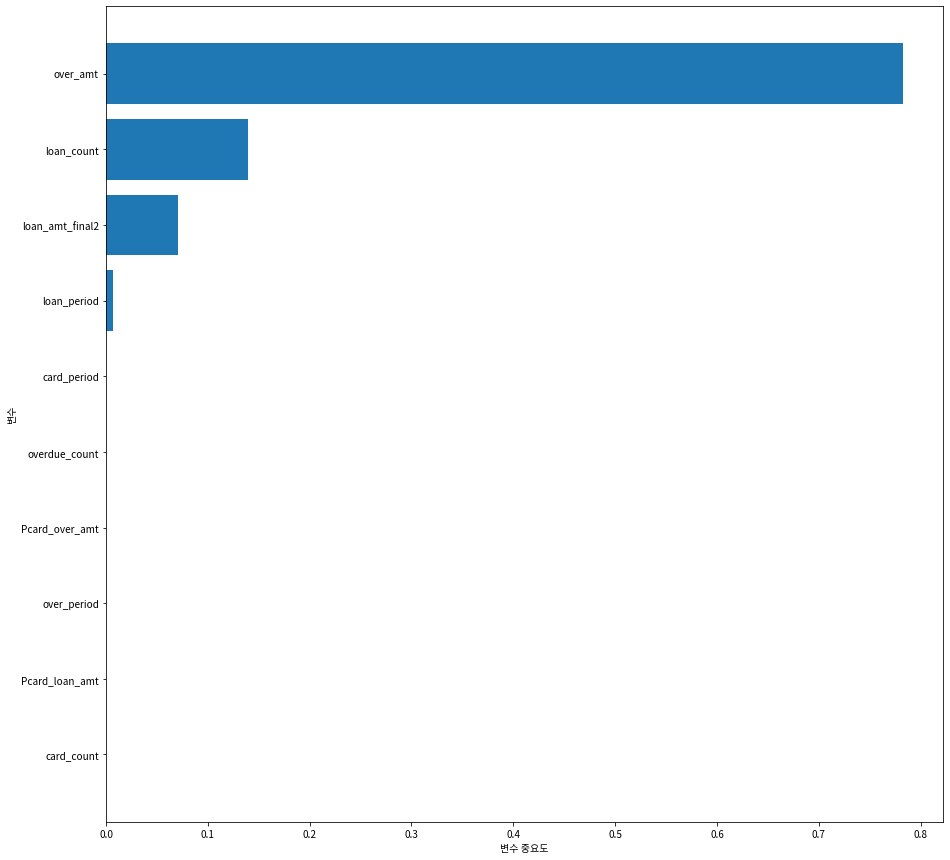

In [275]:
# 중요 변수 결과: age, cement, water 순으로 영향이 크다고 해석
plt.figure(figsize = (15,15))
df_importance.sort_values('Importance', ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

### 결론_2

In [276]:
tree_final1 = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 5,
                                  min_samples_split = 16, max_depth = 8)
tree_final1.fit(df_train_x, df_train_y)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=5, min_samples_split=16,
                      random_state=1234)

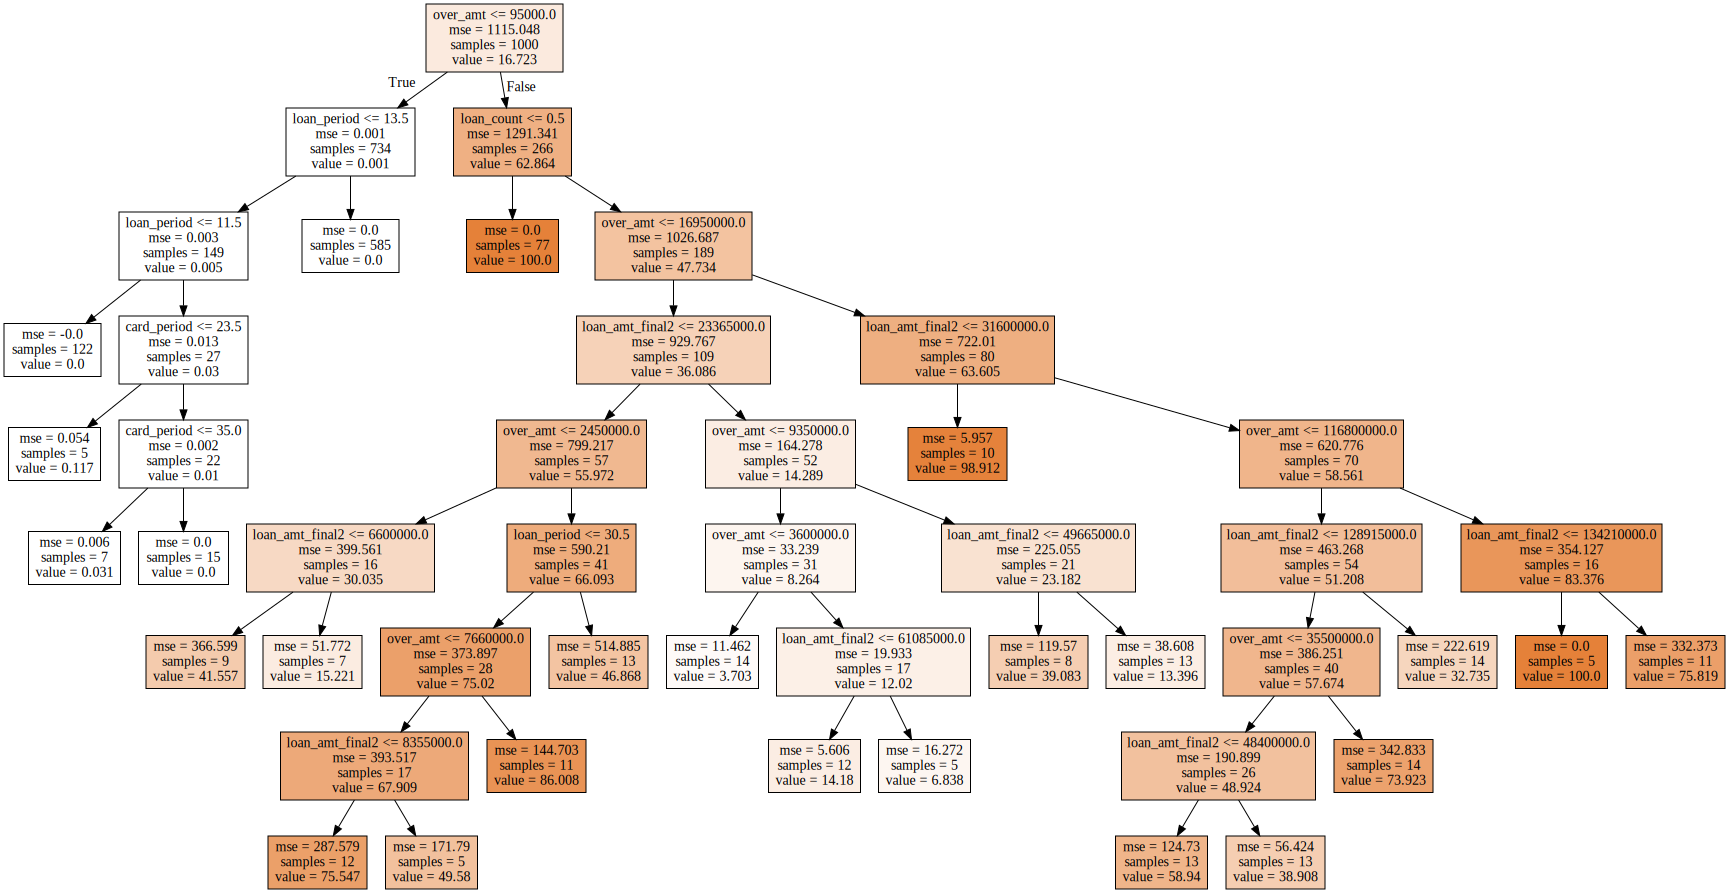

In [277]:
export_graphviz(tree_final1, out_file = 'tree_final.dot',
               feature_names = v_feature_name, impurity = True, filled = True)

with open('tree_final.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

(graph, ) = pydot.graph_from_dot_file('tree_final.dot', encoding = 'utf8')
graph.write_png('tree_final.png')

In [278]:
y_pred = tree_final1.predict(df_test_x)
print("Train: {:.3f}\n".format(tree_final1.score(df_train_x, df_train_y)))
print("Accurancy: {:.3f}\n".format(tree_final1.score(df_test_x, df_test_y)))

Train: 0.971

Accurancy: 0.913



In [279]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
6,over_amt,0.783
8,loan_count,0.140
7,loan_amt_final2,0.071
2,loan_period,0.007
1,card_period,0.000
0,card_count,0.000
3,Pcard_loan_amt,0.000
4,over_period,0.000
5,Pcard_over_amt,0.000
9,overdue_count,0.000


Text(0, 0.5, '변수')

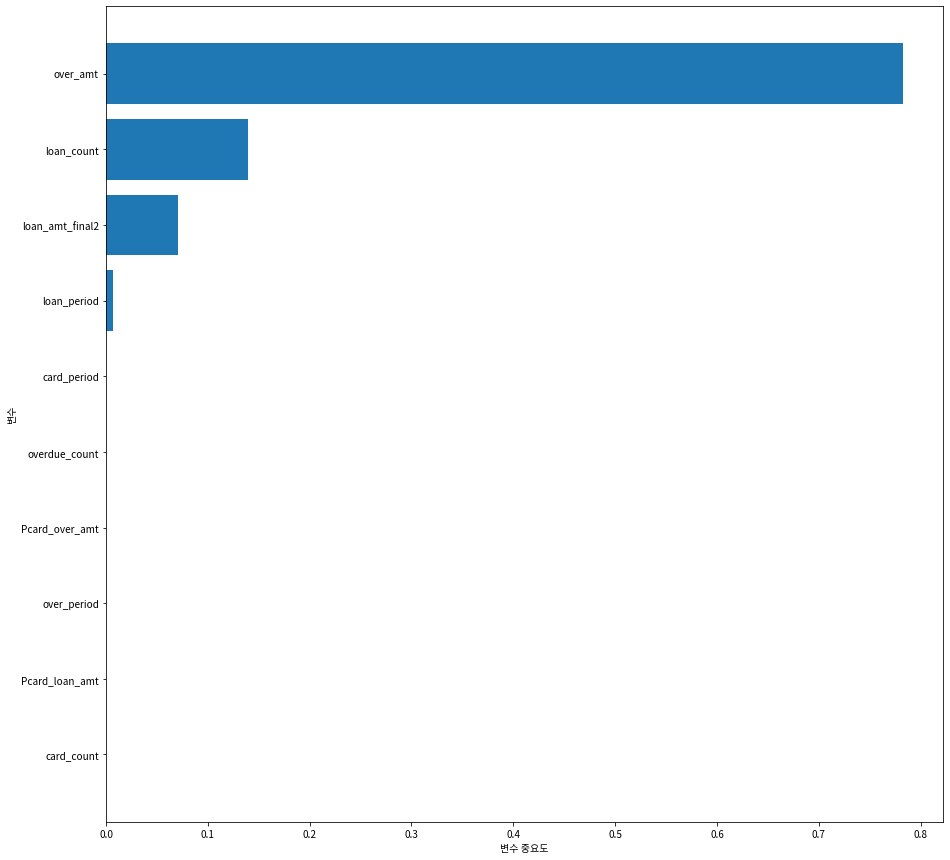

In [280]:
# 중요 변수 결과: age, cement, water 순으로 영향이 크다고 해석
plt.figure(figsize = (15,15))
df_importance.sort_values('Importance', ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')